# Chapter 5

## 5.1 Spurious Association
## 5.2 Masked Relationship
## 5.3 Categorical variables

## Intro
+ Multiple regression - using more than 1 predictor variable to model an outcome
+ Why use?:
    + Statistical control for confounds - A confound makes a variable of no real importance seem important.
        + Storks -> babies actually more chimneys - more houses - more stork nests more babies
        + Cities in USA - number of dogs -> number of road traffic accidents
    + Multiple causation Net wealth could be earned , inherited
    + Interaction - where two variables react with each other
![alt text](images/5/Interaction_plot_stroke_survival.svg.png "Title")

+ lecture 5 Link
    + https://www.youtube.com/watch?v=UpP-_mBvECI


# 5.1 Spurious Association

## Waffle Dataset

In [1]:
suppressMessages({
library(rethinking)
library(dagitty)
    })
data(WaffleDivorce)
d <- WaffleDivorce

In [2]:
head(d)

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00
6,Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00


In [3]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Location,NaN,NA,NA,NA,
Loc,NaN,NA,NA,NA,
Population,6.119600e+00,6.876156e+00,0.65780,1.897690e+01,▇▃▁▁▁▁▁▁
MedianAgeMarriage,2.605400e+01,1.243630e+00,24.26950,2.826100e+01,▁▁▂▂▃▇▅▃▁▁▂▁▁▁
Marriage,2.011400e+01,3.797905e+00,15.20850,2.649150e+01,▁▃▇▇▇▅▂▁▁▁
Marriage.SE,1.399400e+00,7.969749e-01,0.54950,2.902200e+00,▁▇▅▃▁▂▁▁
Divorce,9.688000e+00,1.820814e+00,6.66950,1.273050e+01,▂▃▅▅▇▂▃▁
Divorce.SE,9.618000e-01,5.253675e-01,0.34085,1.893050e+00,▂▇▇▃▃▂▁▂▂▁▁▁
WaffleHouses,3.234000e+01,6.578959e+01,0.00000,1.357450e+02,▇▁▁▁▁▁▁▁


In [4]:
dim(d)

[1] 50 13

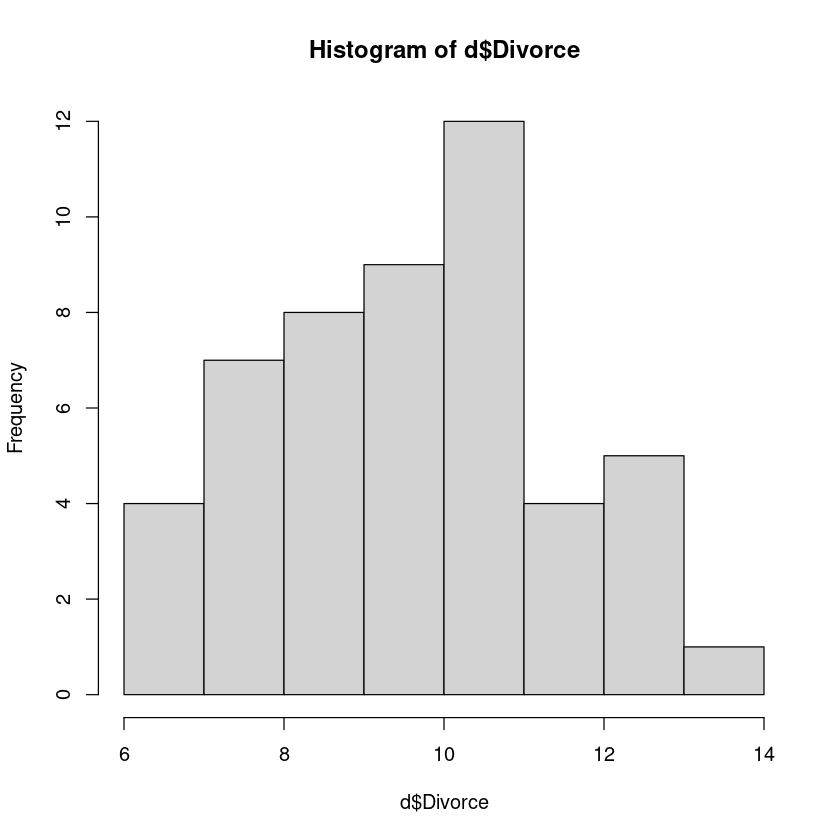

In [5]:
hist(d$Divorce)

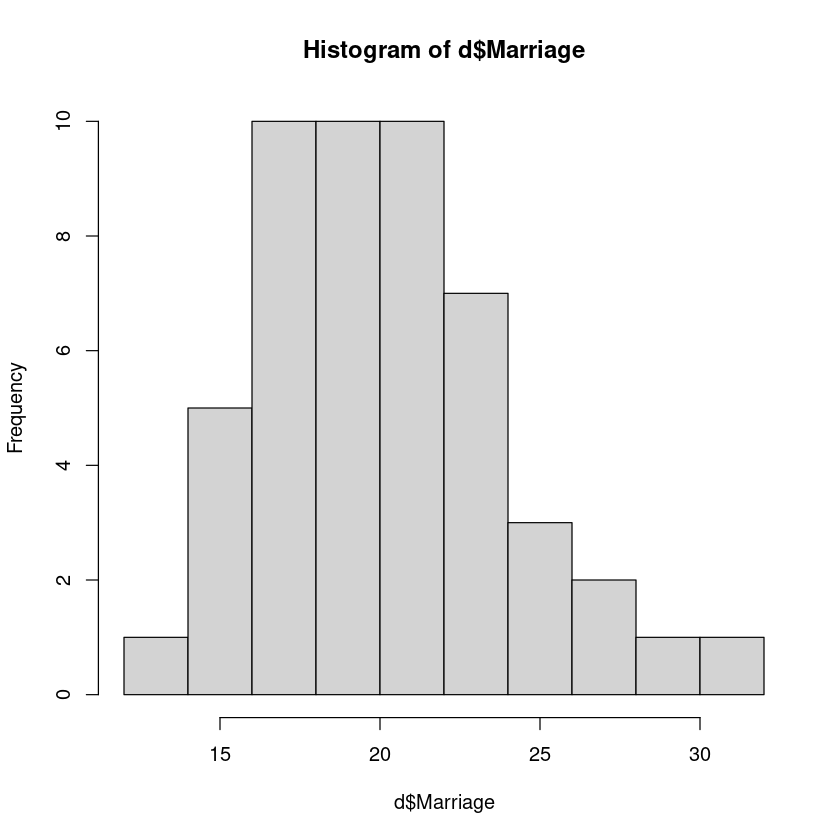

In [6]:
hist(d$Marriage)

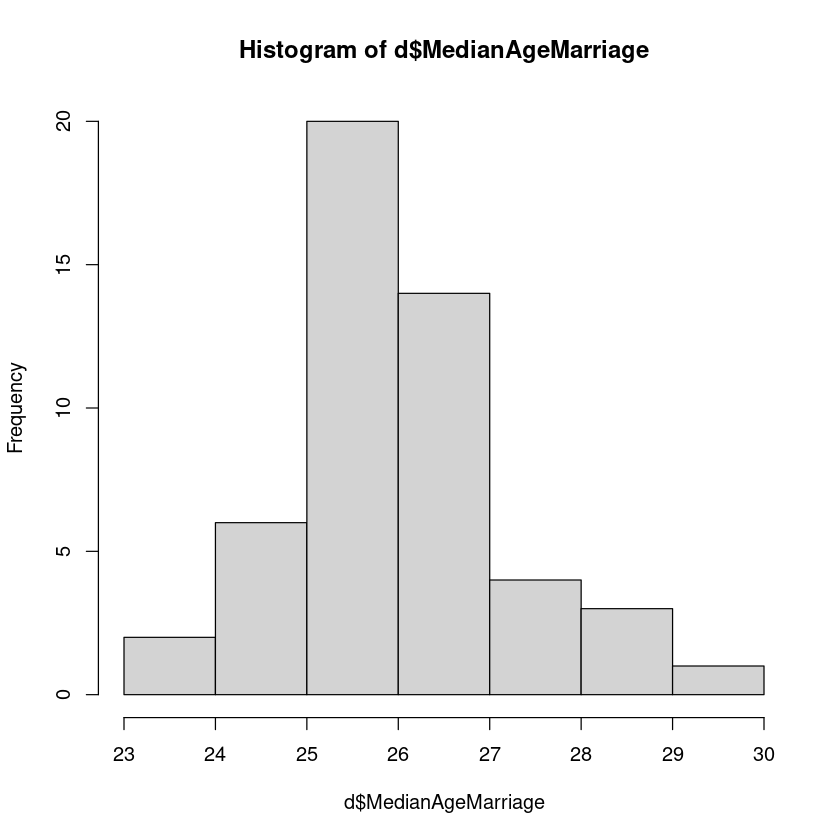

In [7]:
hist(d$MedianAgeMarriage)

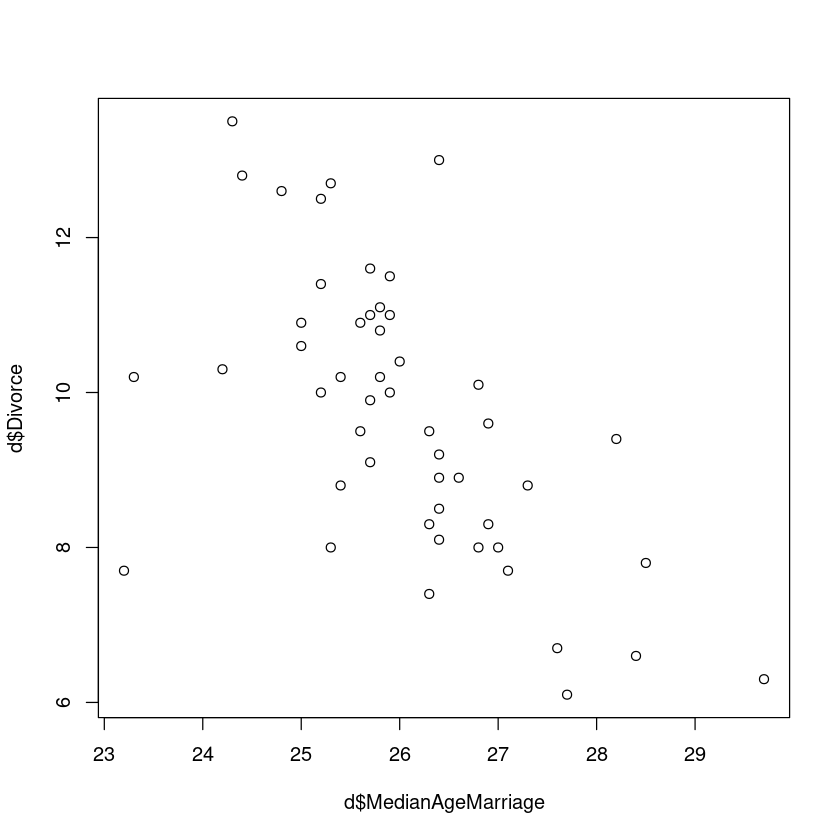

In [8]:
# Association between median marriage age and divorce
plot(d$MedianAgeMarriage, d$Divorce)

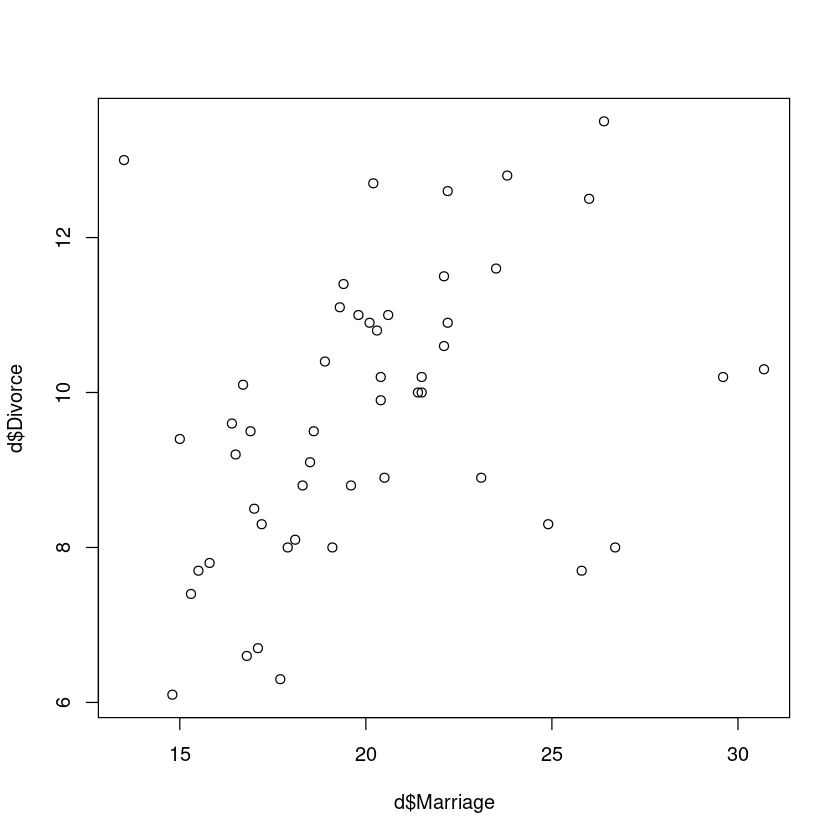

In [9]:
# Association between marriage rate and divorce rate
plot(d$Marriage, d$Divorce)

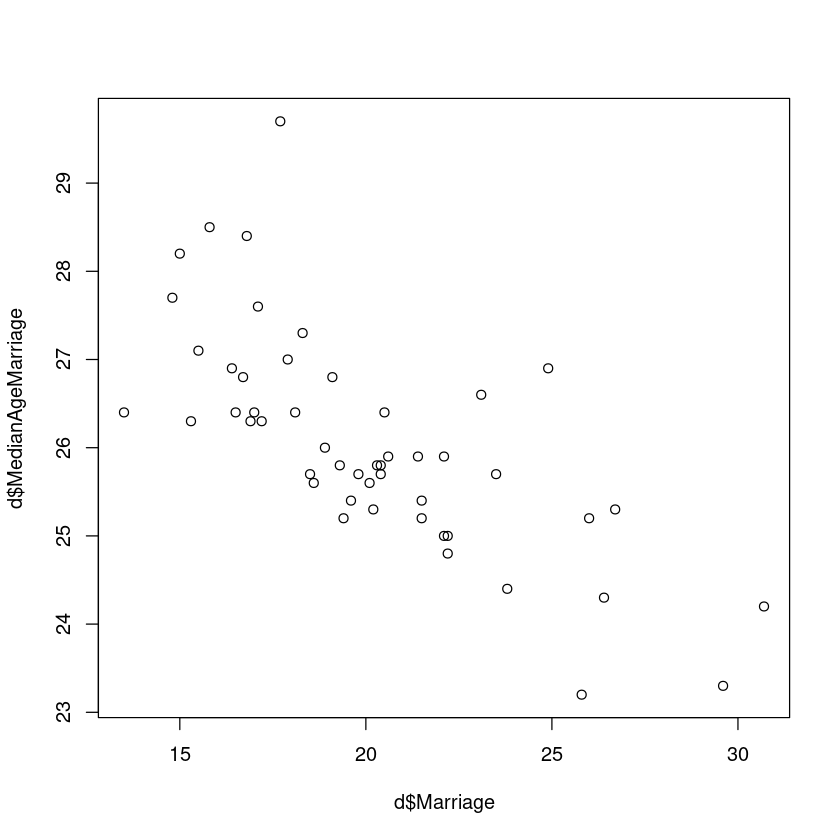

In [10]:
# association between marriage rate and median marriage age
plot(d$Marriage, d$MedianAgeMarriage)

In [11]:
# Form a dataframe and do a pairs plot ? - 
# pairs(cbind(c(d$Marriage, d$MedianAgeMarriage)))

## Scale the variables
+ Scale means subtract mean and divide by standard deviation
+ Winds up as a standardized distribution centred at 0, where + 1 means 1 standard deviation distance from 0

In [12]:
d$D <- scale(d$Divorce)
d$A <- scale(d$MedianAgeMarriage)
d$M <- scale(d$Marriage)

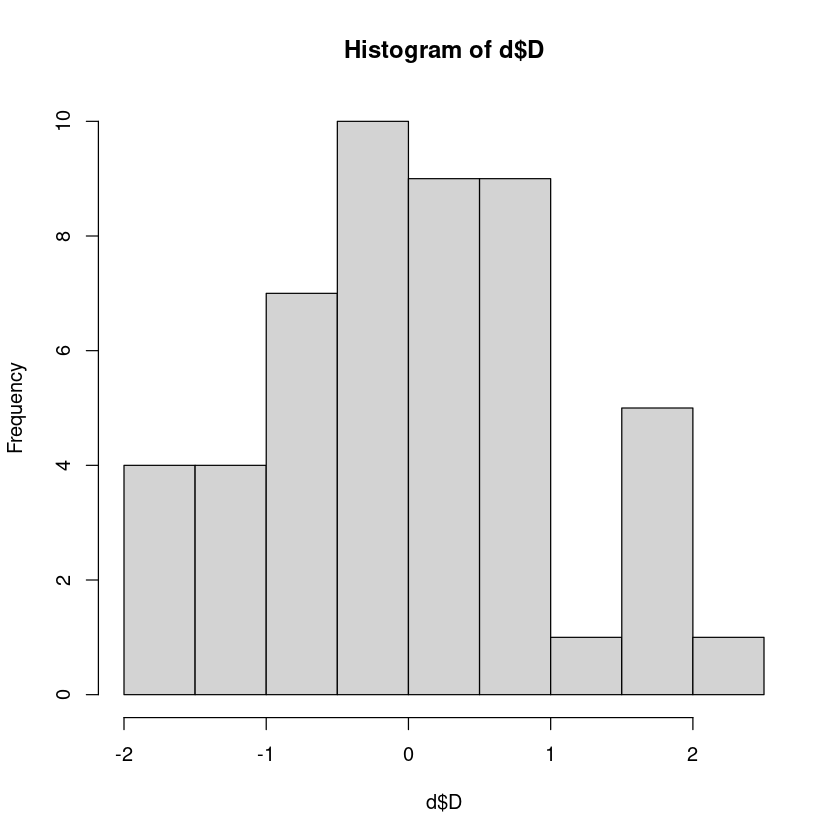

In [13]:
hist(d$D)

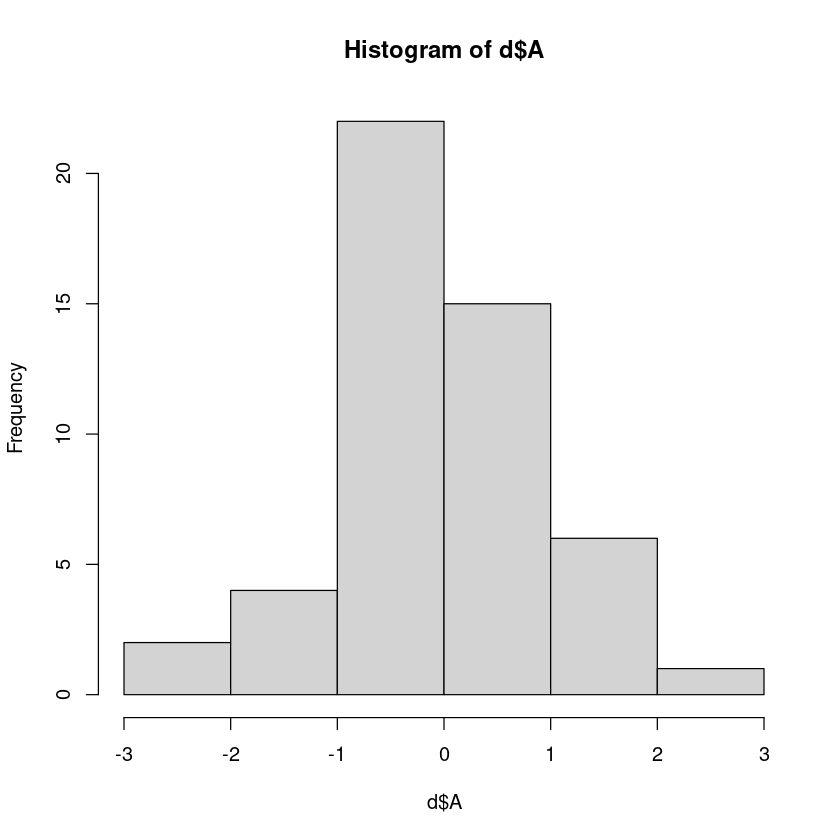

In [14]:
hist(d$A)

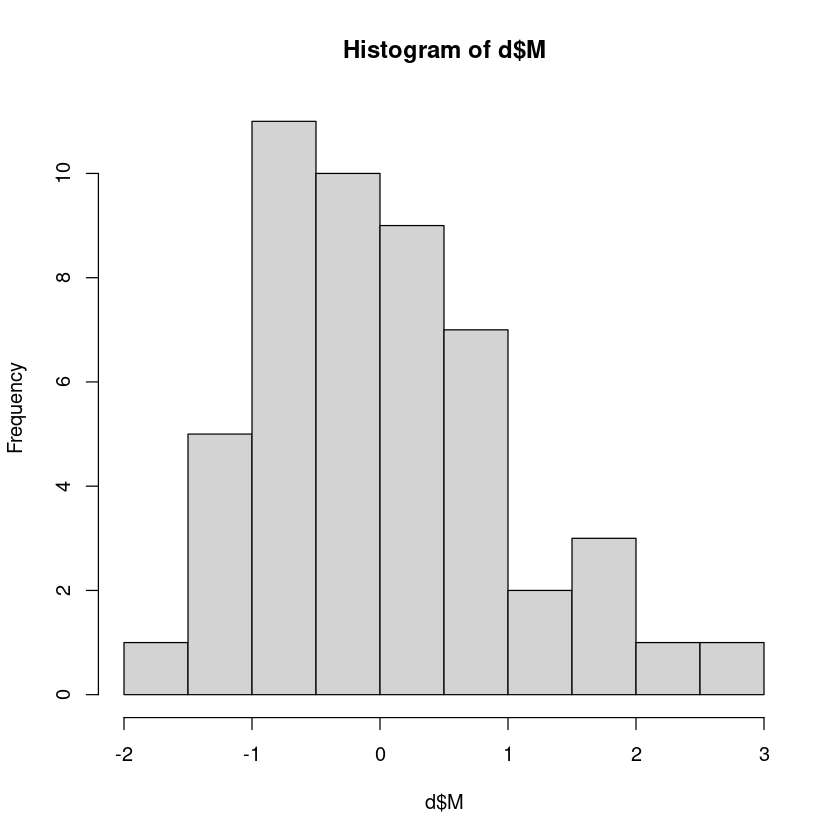

In [15]:
hist(d$M)

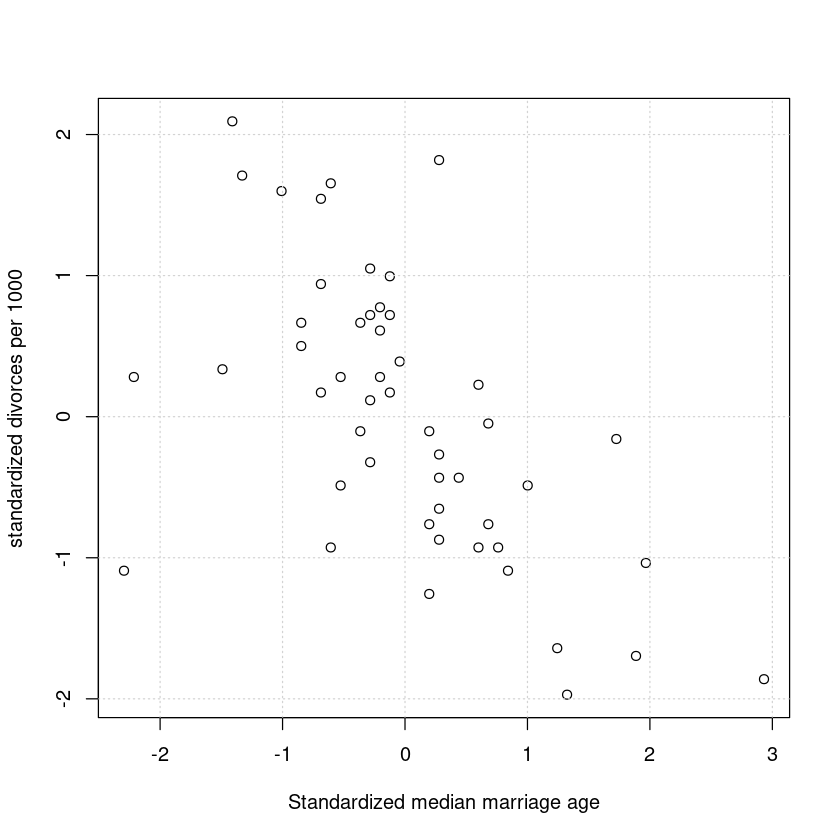

In [16]:
plot(d$A, d$D, xlab='Standardized median marriage age', ylab='standardized divorces per 1000')
grid()

## Start with Single variable Linear Regrssion

+ What is the relationship between Median marriage age and divorce rate?
+ Some data facts:
    + median marriage age
        + mean 26
        + stdev 1.2
    + divorce rate
        + mean 9.7
        + stdev 1.8
+ Our linear model will be something like:
    + Divorce rate  (for a state) ($\mu_i$) = $\alpha$ + parameter ($\beta_{A}$) x median marriage age for a state ($A_i$)
+ What are the impplications of standardizing the data on the priors?
    + y = c = mx ie the equation for a straight line
    + c is the intercept - what values is it likely to take ?
    + m is the gradient - what values is it likely to take ?

### Model

![alt text](images/5/model-1.png "Title")

+ line 1 - each state's divorce rate is normally distributed with a mean specific to the state and a common standard deviation sigma (Likelihood)

+ line 2 - the state specific mean = parameter alpha + parameter B_A x median mariage age of that state (linear model)

+ line 3 - parameter alpha is normally distributed centered at 0, with stdev = 0.2 (alpha prior)

+ line 4 - parameter beta is normally distributed centered at 0, with stdev = 0.5 (beta prior)

+ line 5 - common standard deviation sigma is exponentially distributed with param=1 (sigma prior)

### The priors - Working from bottom up

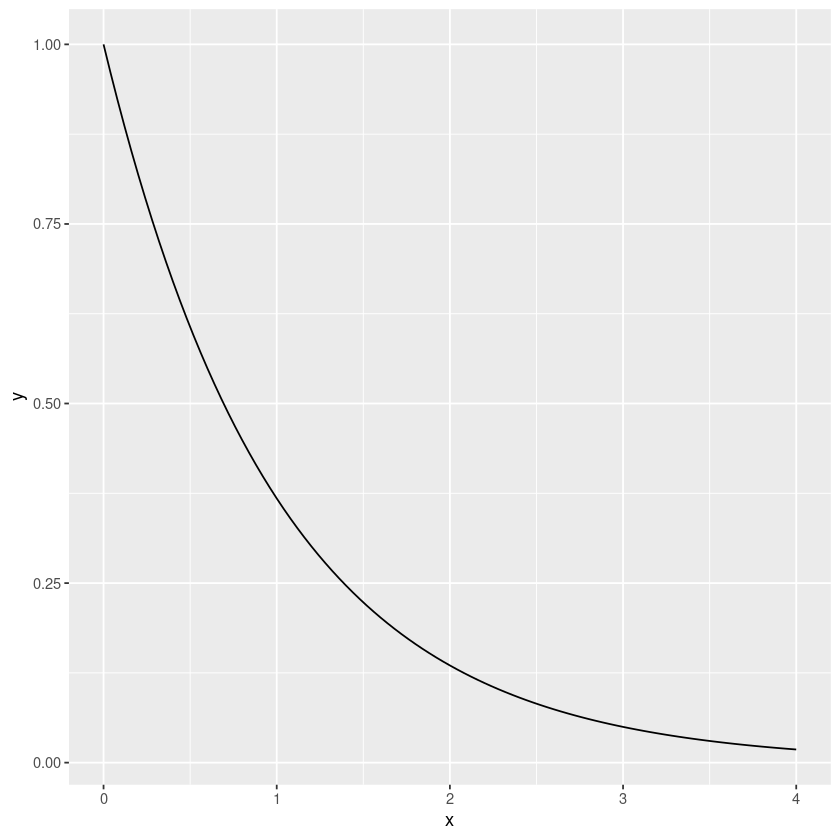

In [17]:
# sigma
ggplot(data.frame(x = c(0, 4)), aes(x = x)) +
stat_function(fun = dexp, args=c(1.0))

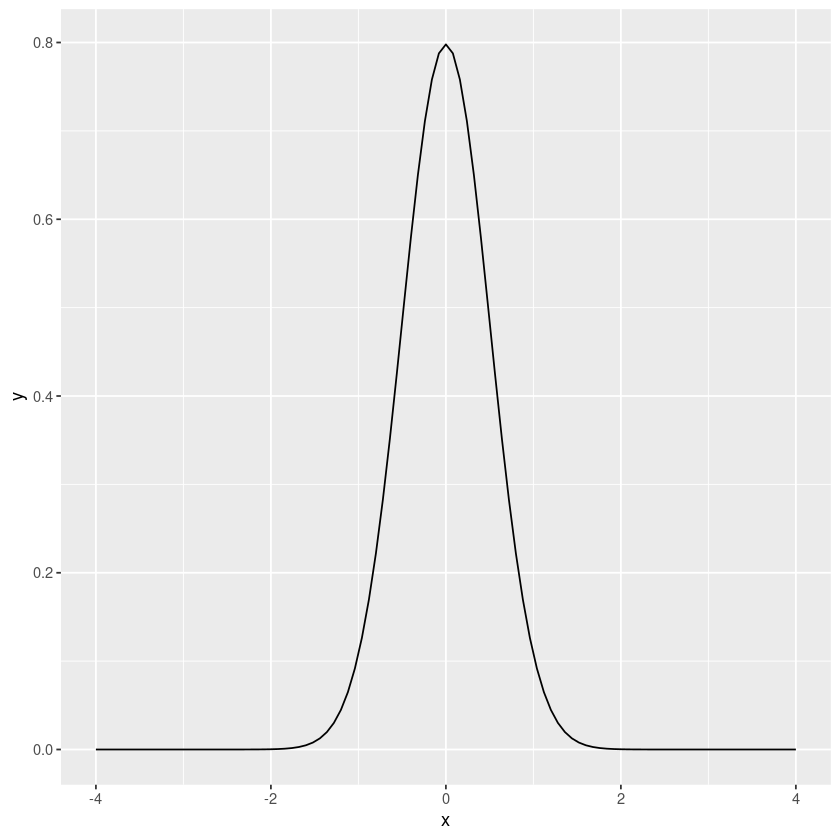

In [18]:
# beta
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
stat_function(fun = dnorm, args=c(mean=0.0, sd=0.5))

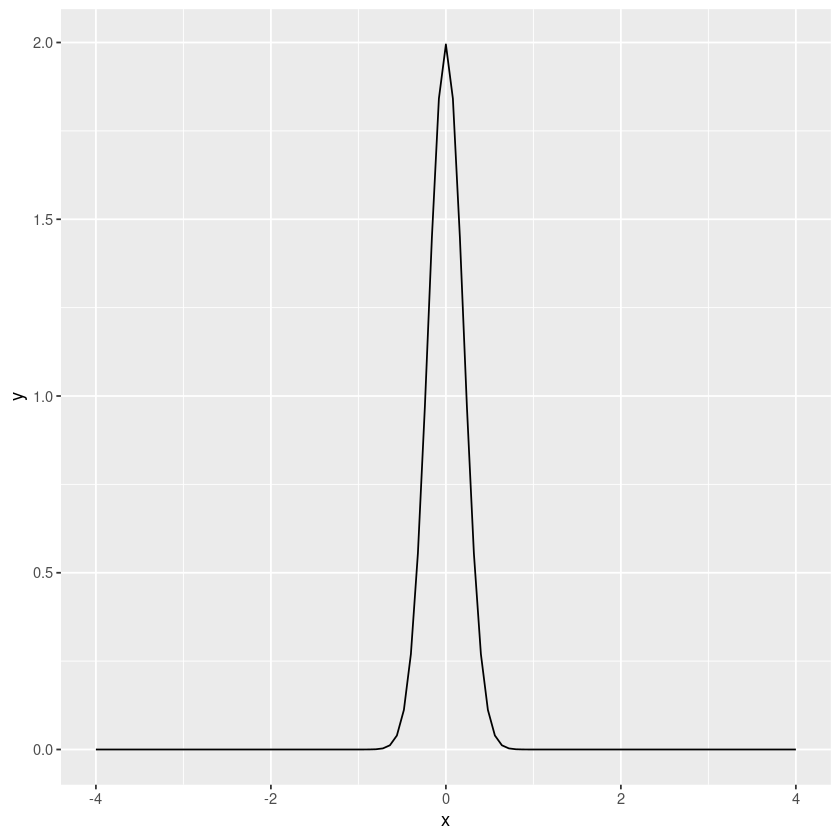

In [19]:
#alpha
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
stat_function(fun = dnorm, args=c(mean=0.0, sd=0.2))

![alt text](images/5/model-1.png "Title")

First - remember we are in standardized land

Why those priors?
+ alpha - the intercept - makes sense should be around 0 if plotting 2 standardized distributions against each other
+ beta - this parameter multiplies the state's median marriage age to get the state's divorce rate per 1000.
If beta = 1 then that shifts the median age by 1 standard deviation and the divorce rate by 1 standard deviation. So a change in 1.25 years would mean a change of 1.8 in divorce rate. Divorce rate is between 6 and 14 and is centered around 10.. I don't get this?

If beta = 0.5 then that shifts the state's divorce rate by 0.5 standard deviations. So a change in 0.625 years would mean a change of 0.9 in divorce rate. Why is this +/-. Surely the shape of the plot means it has to be minus?

??? This doesn't make sense we are just multiplying a standardized number to get a standardized number???

We know marriage age ranges from 23 to 30 and is centered around 26. The linear formula is beta x state's median marriage age
    + If beta = 1, then for divorce rate would shift by 1 x 1 = 1 for a state where age 1 year higher than median, would shift by (30 -26) x 1 = 
    + if beta = 2, then divorce rate would shift b

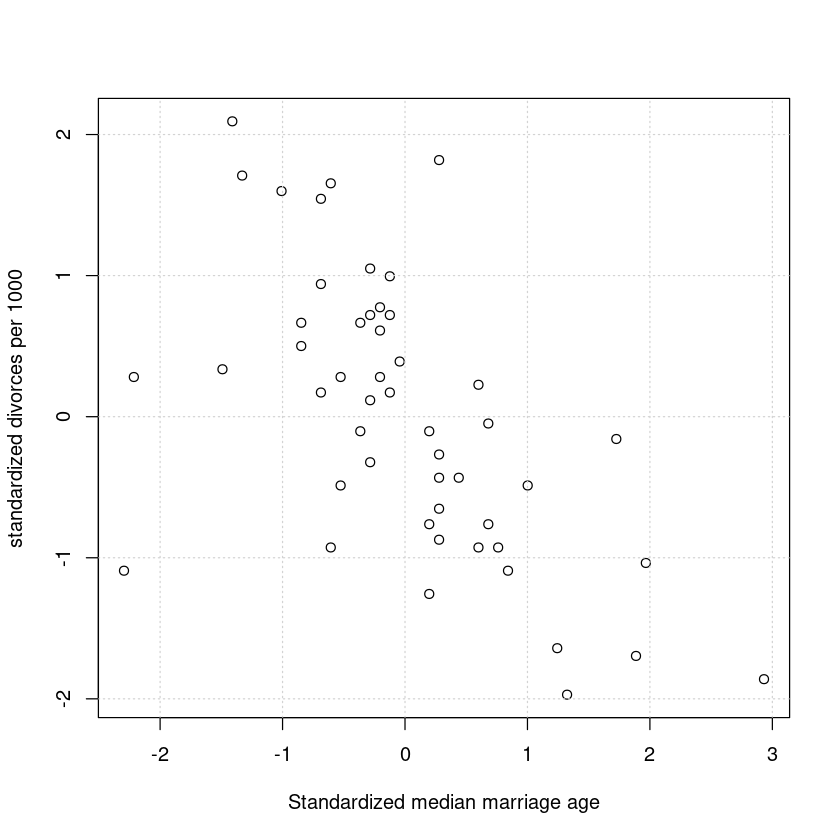

In [20]:
plot(d$A, d$D, xlab='Standardized median marriage age', ylab='standardized divorces per 1000')
# abline(lm(d$A ~ d$D))
grid()

### Model as Code

In [21]:
# R code 5.3
m5.1 <- quap(
    alist(
        D ~ dnorm(mu, sigma), # likelihood
        mu <- a + bA * A, # linear model
        a ~ dnorm( 0, 0.2), # alpha prior
        bA ~ dnorm(0, 0.5), # beta prior
        sigma ~ dexp(1) # sigma prior
    ), data=d)

+ $D_i ~ Normal(mu_i, sigma)$ - Means the (zero centered, stdev=1) Divorce rate for state i is normally distributed with paramters mu_i, sigma

+ mu <- a + bA + A - $mu_i = alpha + beta_{age}\,x \,age_i$
    + mean divorce rate in a state = base divorce rate (intercept) x factor beta x 

+ a ~ dnorm( 0, 0.2) - alpha is normally distributed centred at 0, with small standard deviation. This means - What is the divorce rate when marriage age is mean of marriage ages?
    + Why? - Because both variables are standardized meaning that the intercept should be around 0


+ bA ~ dnorm(0, 0.5) - beta is normally distributed centred at 0, with stdev=0.5
+ sigma ~ dexp(1) - sigma exponentially distributed parameter = 1

### Simulate priors

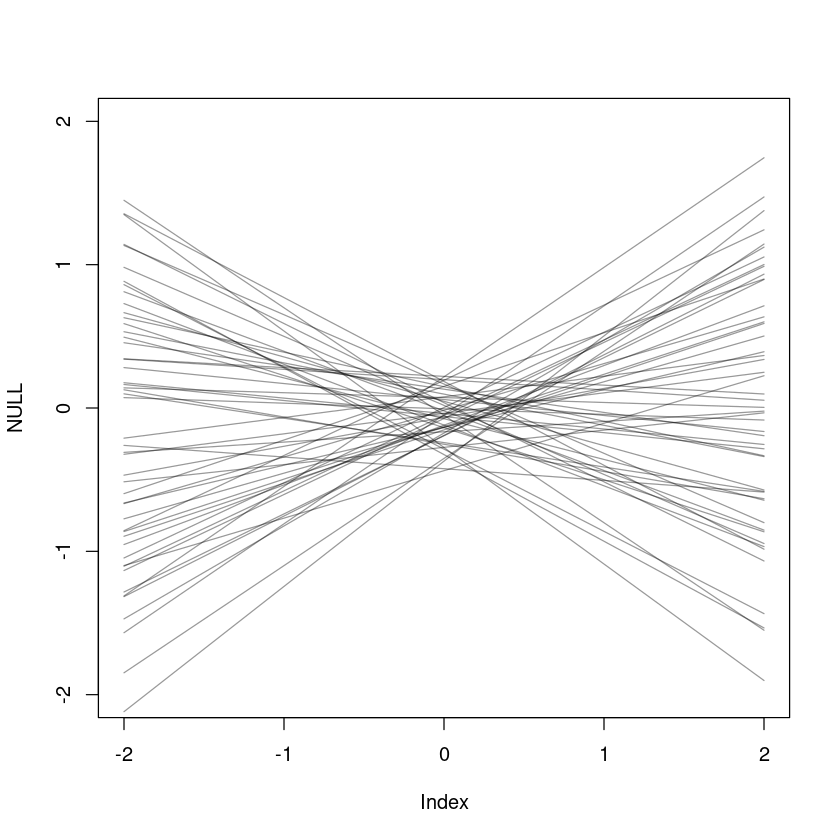

In [22]:
set.seed(10)
prior <- extract.prior(m5.1)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2, 2), ylim=c(-2,2))
for ( i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha("black", 0.4))

### My (better?) priors

In [23]:
m5.1a <- quap(
    alist(
        D ~ dnorm(mu, sigma), # likelihood
        mu <- a + bA * A, # linear model
        a ~ dnorm( 0, 0.2), # alpha prior
        bA ~ dnorm(-1.0, 0.4), # beta prior
        sigma ~ dexp(1) # sigma prior
    ), data=d)

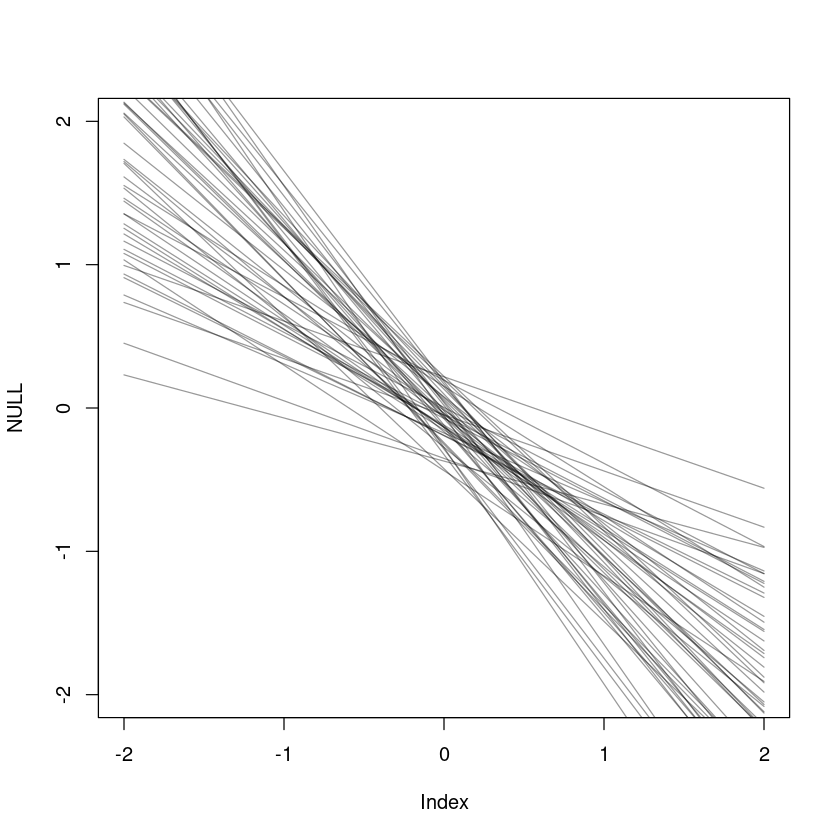

In [24]:
set.seed(10)
prior <- extract.prior(m5.1a)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2, 2), ylim=c(-2,2))
for ( i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha("black", 0.4))

# My priors
+ Are they better?
    + For this specific case - maybe
    + As general priors - No - because biased towards a negative association

### Posterior Predictions

In [25]:
# compute percentile interval of mean
A_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.1, data=list(A=A_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

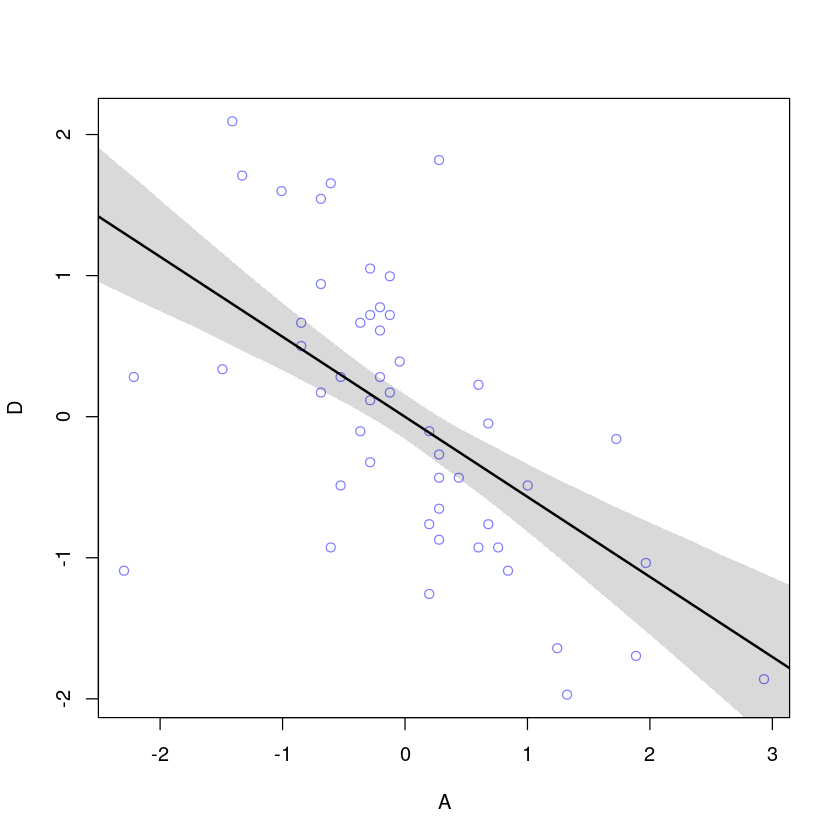

In [26]:
plot(D ~ A, data=d, col=rangi2)
lines(A_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [27]:
precis(m5.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,3.778906e-05,0.09737524,-0.1555867,0.1556622
bA,-5.684149e-01,0.10999473,-0.7442077,-0.3926221
sigma,7.882883e-01,0.07800211,0.6636259,0.9129507


#### using my better priors

In [28]:
# compute percentile interval of mean
A_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.1a, data=list(A=A_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

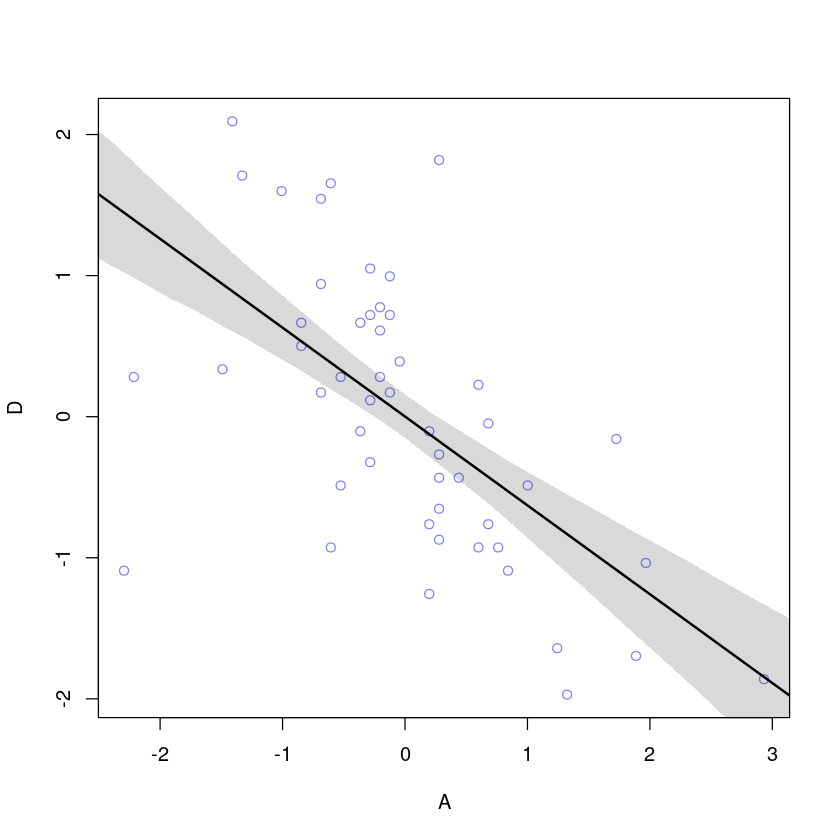

In [29]:
plot(D ~ A, data=d, col=rangi2)
lines(A_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [30]:
precis(m5.1a)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,4.430189e-06,0.09738231,-0.1556313,0.1556402
bA,-6.268116e-01,0.10854380,-0.8002856,-0.4533377
sigma,7.883633e-01,0.07801900,0.6636739,0.9130527


### Relationship between marriage rate and divorce rate

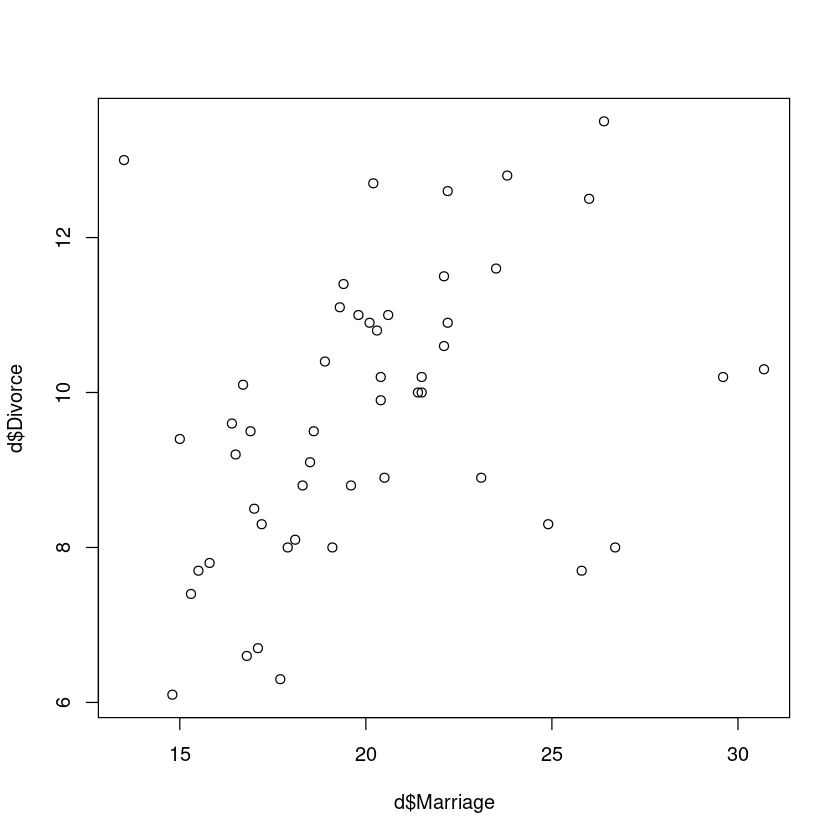

In [31]:
plot(d$Marriage, d$Divorce)

In [32]:
d$M <- scale(d$Marriage)

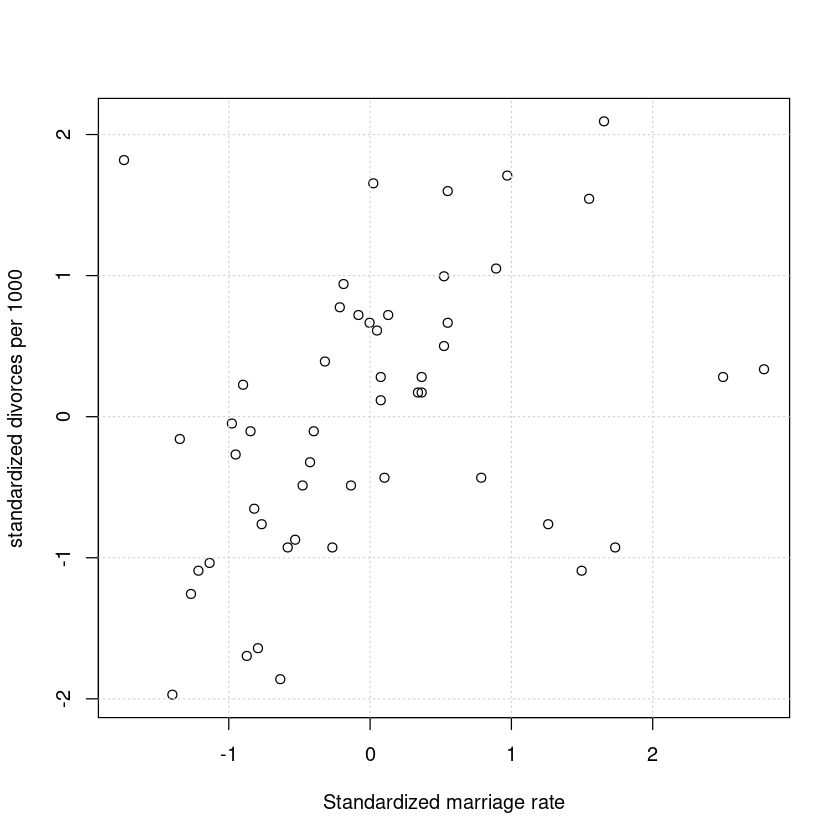

In [33]:
plot(d$M, d$D, xlab='Standardized marriage rate', ylab='standardized divorces per 1000')
# abline(lm(d$A ~ d$D))
grid()

In [34]:
# Note exactly the same priors
m5.2 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bM * M,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=d)

In [35]:
# compute percentile interval of mean
M_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.2, data=list(M=M_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

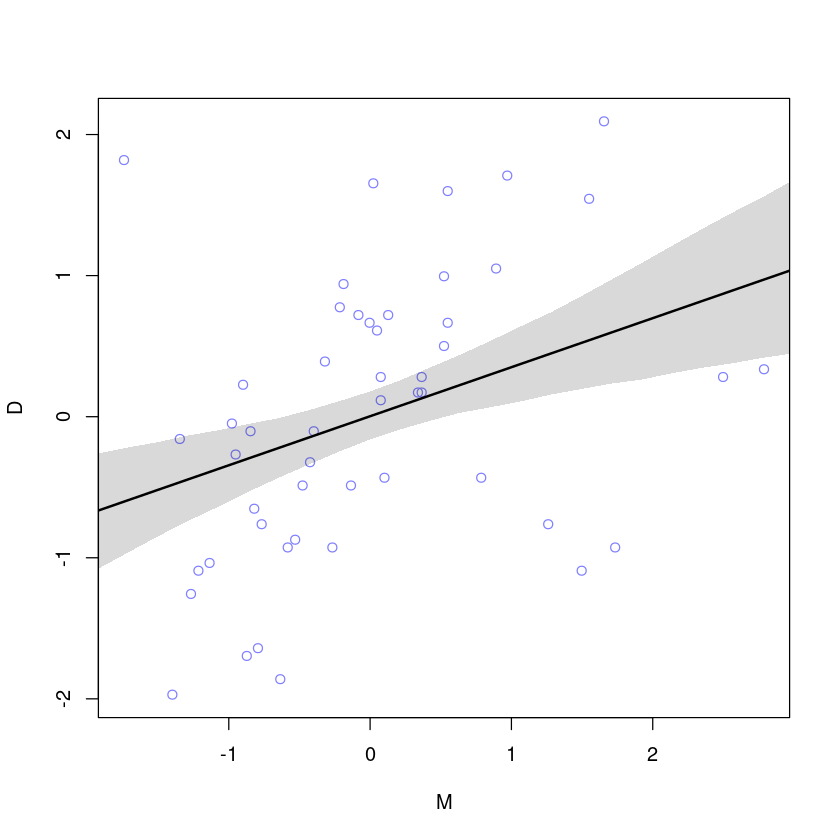

In [36]:
plot(D ~ M, data=d, col=rangi2)
lines(M_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [37]:
precis(m5.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,6.689489e-07,0.10824646,-0.1729981,0.1729994
bM,3.500544e-01,0.12592750,0.1487979,0.5513109
sigma,9.102659e-01,0.08986252,0.7666482,1.0538835


+ The relationship is not as strong between marriage rate and divorce rate - the mean of marriage_beta = 0.35
+ The relationship between marriage age and divorce rate is stronger age_beta = -0.56
+ What do we do?

### Think before you regress
+ DAG
+ Graph means points (nodes) and lines (connections)
+ Directed means connections are directional
+ Acyclic means does not flow back on itself (How can a 3 point graph flow back on itself?)

## Elemental Confounds
+ need to learn these 4, and then use them to build more complex models

![alt text](images/5/causal-alchemy.png "Title")

## Where is this causal model in the 4 models above?

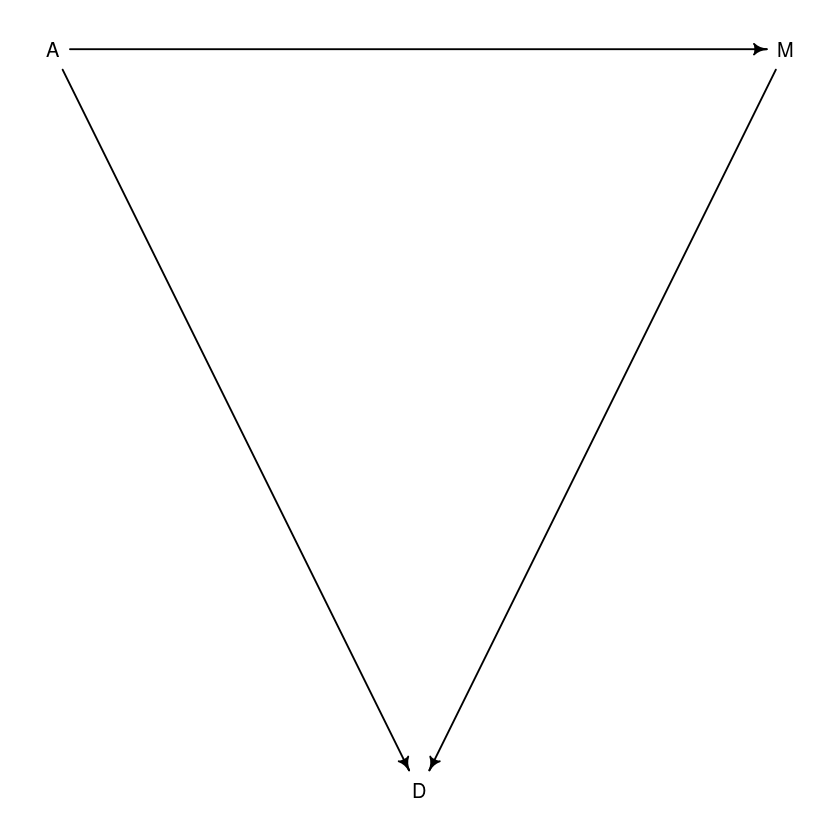

In [38]:
dag5.1 <- dagitty( "dag {
A -> D
A -> M
M -> D
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag( dag5.1 )

+ A directly influences D marriage age directly influences divorce rate
+ M directly influences D marriage rate directly influences divorce rate
+ A directly influences M marriage age directly influences marriage rate

+ Model 5.1 relates A to D. as marriage age goes up divorce rate tends to come down - the regression D on A -
tells us the total influence of A on D, but A goes through two paths (straight to D (A -> D) and via M (A ->M -> D))
+ It could be that A has do direct effect on D. All of it's effect could be routed thru M. This relationship is known as MEDIATION
+ Or The relationship could look like the one below

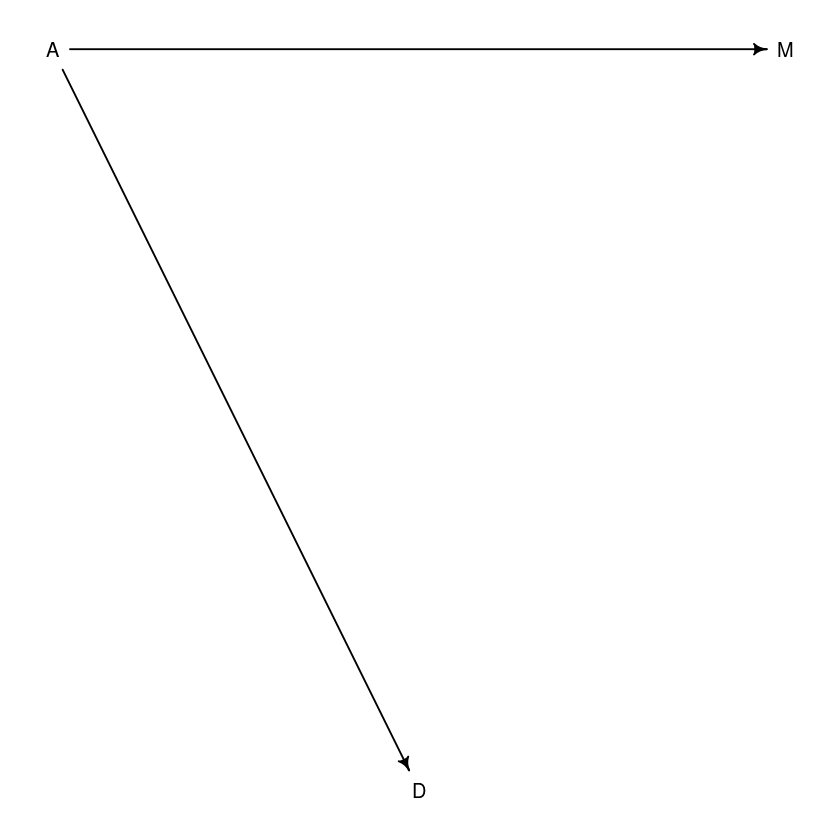

In [39]:
dag5.1 <- dagitty( "dag {
A -> D
A -> M
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag( dag5.1 )

5.1.2 Testable Implications of each possible Model

For triangle model testable implications:
    + D not independent of A
    + D not independent of M
    + A not independent of M

In [40]:
print(cor(d$D, d$A))
print(cor(d$D, d$M))
print(cor(d$A, d$M))

           [,1]
[1,] -0.5972392
          [,1]
[1,] 0.3737314
          [,1]
[1,] -0.721096


"all 3 pairs are strongly associated" - Are they? What is a threshold for saying there is/is not a correlation?

In [41]:
DMA_dag1 <- dagitty('dag{ D <- A -> M -> D }')
impliedConditionalIndependencies( DMA_dag1 )
# No conditional independencies so no output to display

For 2 prong DAG
    + D not dependent of A
    + A not dpendent of M

In [42]:
DMA_dag2 <- dagitty('dag{ D <- A -> M }')
impliedConditionalIndependencies( DMA_dag2 )

D _||_ M | A

+ ### Multiple Regression is a way of conditioning
    + where conditioning is "controlling for", "taking account of", holding the conditioning variable at one level and getting results, and then holding at another level and getting results.
+ If we fit a multiple regression to predict divorce using marriage rate and age, the model tells us:
    + After I know marriage rate, what additional value is there in knowing age at marriage
    + After I know age at marriage, what additional value is there in knowing marriage rate?
+ In generela, multiple regression tells us:
    + **Is there any additional value in knowing a variable, once I already know all of the other predictor variables?**
+ The posterior parameters are the answers to these questions 

# 5.1.3 Multiple Regression Notation
![alt text](images/5/multi-regression.png "Title")

In [38]:
# R code 5.10
m5.3 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bM*M + bA*A,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=d)
precis(m5.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,3.580155e-08,0.09707597,-0.1551461,0.1551462
bM,-6.538099e-02,0.15077295,-0.3063453,0.1755833
bA,-6.135129e-01,0.15098350,-0.8548136,-0.3722121
sigma,7.851174e-01,0.07784324,0.6607088,0.9095259


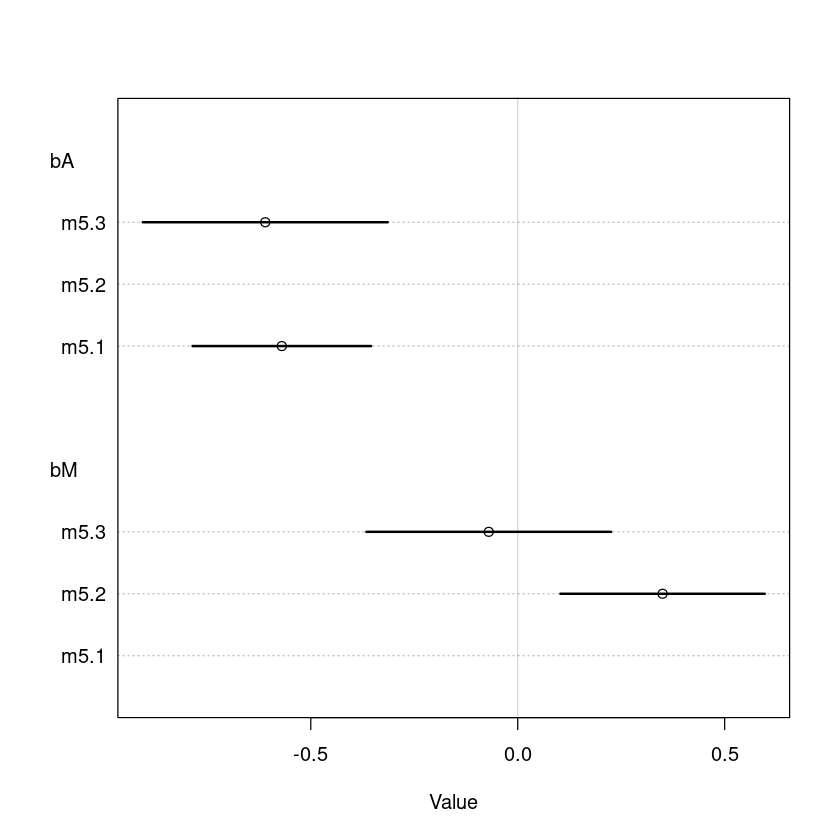

In [39]:
plot( coeftab(m5.1,m5.2,m5.3), par=c("bA","bM") )

**Conclusion**

Once we know median marriage age, there is very little predictive power in knowing the rate of marriage

The first (triangle DAG) did not say this, so it is gone

```I’ll leave it to the reader to investigate the relationship between age at marriage, A, and
marriage rate, M, to complete the picture.```

How?

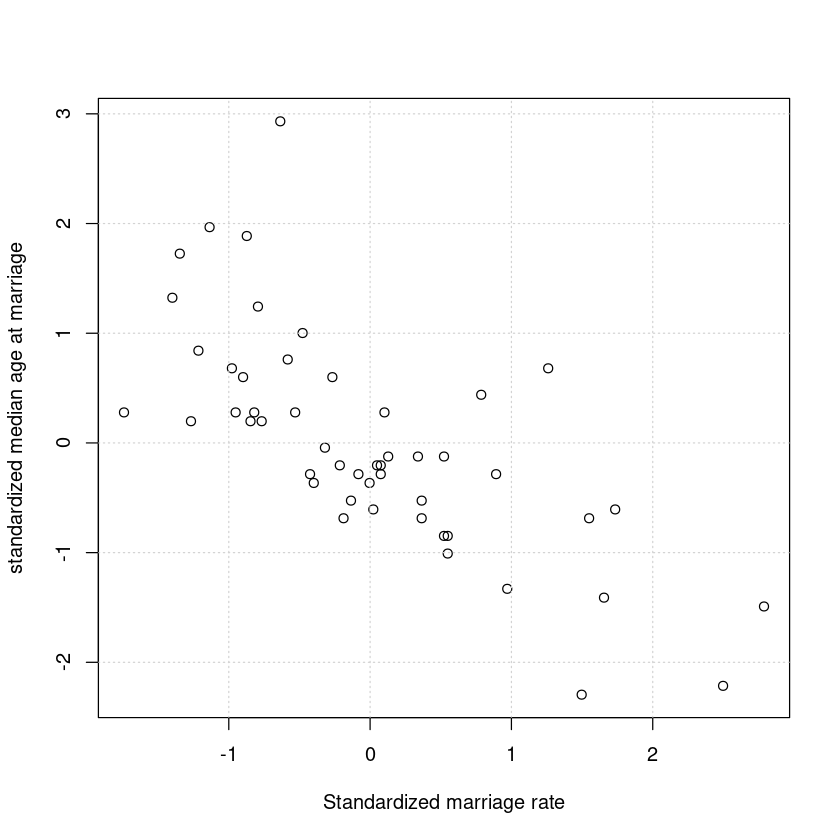

In [40]:
plot(d$M, d$A, xlab='Standardized marriage rate', ylab='standardized median age at marriage')
# abline(lm(d$A ~ d$D))
grid()

### Simulation

In [41]:
N <- 50 # number of simulated States
age <- rnorm( N )
# sim A
mar <- rnorm( N , -age ) # sim A -> M
div <- rnorm( N , age ) # sim A -> D

## 5.1.5 Plotting Multivariate Posteriors

### predictor Residual Plot

+ We have 2 predictors of divorce - age and marriage rate
+ To compute predictor residuals for either we use the other predictor to model it - so we predict age on marriage or marriage on age say with predict marriage using age
+ Then we compute the residuals where residual is predicted marriage rate - observed marriage rate (each state)
![alt text](images/5/residuals-plot.png "Title")

+ We see
    +  plotting the marriage rate residuals against the divorce rate - no association
    + plotting the age at marriage residuals against divorce rate we see association. This shows remaining variation among the residuals, and this variation is associated with divorce rate. Therefore, we have unexplained variation?

# posterior prediction plots
+ Check the model implied predictions against the observed data - important
    + Did the model correctly approxiamte the posterior distribution?
    + How does the model fail? - for an expect examine the cases where the model fails and work out how to improve the model.
    


In [42]:
# call link without specifying new data
# so it uses original data
# M5.3 was multi regression model
mu <- link( m5.3 )
# summarize samples across cases
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
# simulate observations
# Investigate this code - Cannot follow this
# again no new data, so uses original data
D_sim <- sim( m5.3 , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

integer(0)

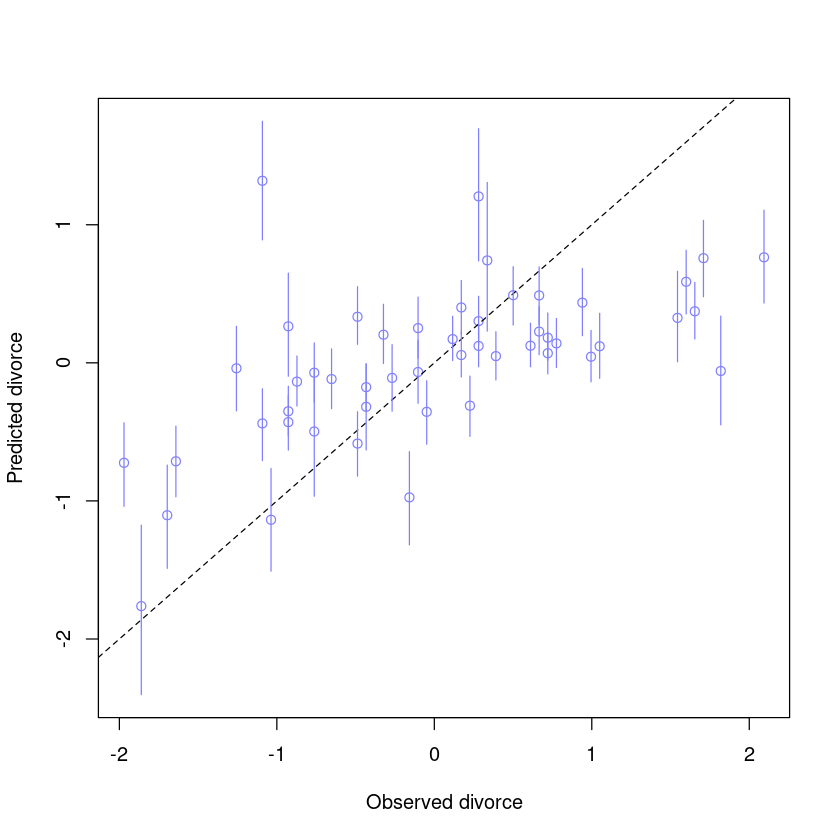

In [43]:
plot( mu_mean ~ d$D , col=rangi2 , ylim=range(mu_PI) ,
xlab="Observed divorce" , ylab="Predicted divorce" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(d) ) lines( rep(d$D[i],2) , mu_PI[,i] , col=rangi2 )
# Doesn't work
identify( x=d$D , y=mu_mean , labels=d$Loc )

+ lines are 89% compatability interval - values most compatible with the data and model.
+ Model underpredicts divorce rate for states with very high observed divorce rates
+ model overpredicts for states with very low observed divorce rates
+ Apparently this is normal and expected! - this is `regression to the mean` ???
+ Some points are very far from the 45 degree line - idaho, Utah - LDS - low divorce rates 

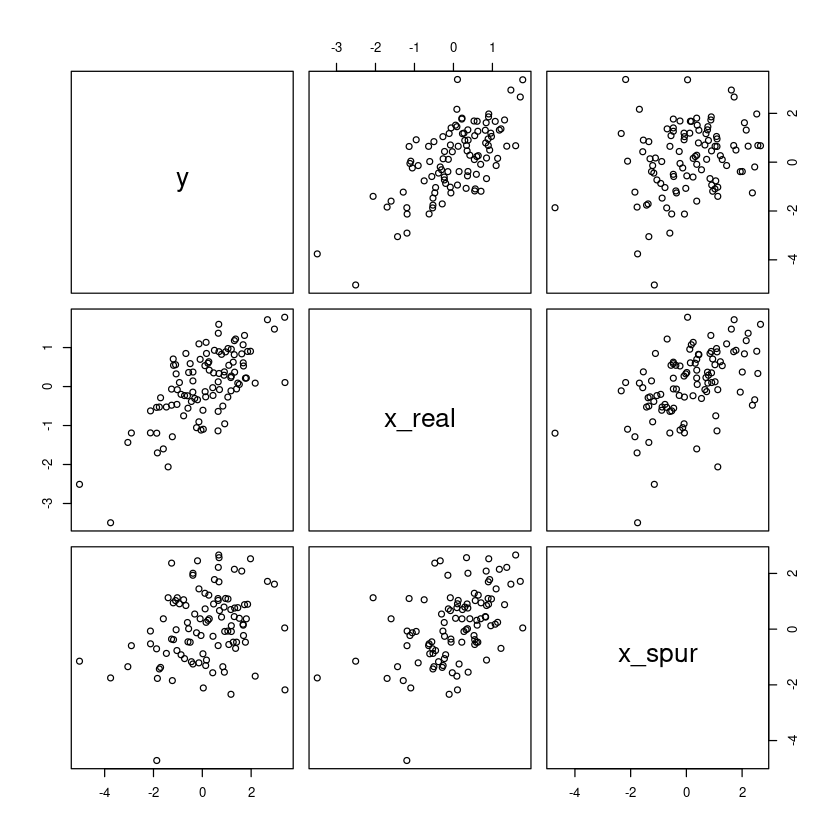

In [44]:
N <- 100
x_real <- rnorm( N )
x_spur <- rnorm( N , x_real )
y <- rnorm( N , x_real )
d <- data.frame(y,x_real,x_spur)
pairs(d)

### Counterfactual Plots
+ This is where simulated data is predicted - the simulated data does not exist
+ Simplest case: how would outcome change if we change one predictor at a time?
+ Still cannot understand this section - cannot find in video

In [45]:
data(WaffleDivorce)
d <- list()
d$A <- standardize( WaffleDivorce$MedianAgeMarriage )
d$D <- standardize( WaffleDivorce$Divorce )
d$M <- standardize( WaffleDivorce$Marriage )

m5.3_A <- quap(
alist(
## A -> D <- M
D ~ dnorm( mu , sigma ) ,
mu <- a + bM*M + bA*A ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 ),
## A -> M
M ~ dnorm( mu_M , sigma_M ),
mu_M <- aM + bAM*A,
aM ~ dnorm( 0 , 0.2 ),
bAM ~ dnorm( 0 , 0.5 ),
sigma_M ~ dexp( 1 )
) , data = d )

In [46]:
precis(m5.3_A)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.215791e-06,0.09707632,-0.1551455,0.1551479
bM,-6.533158e-02,0.15077405,-0.3062976,0.1756345
bA,-6.134674e-01,0.15098471,-0.8547701,-0.3721647
sigma,7.851211e-01,0.07784419,0.6607110,0.9095311
aM,2.952790e-06,0.08684807,-0.1387970,0.1388029
bAM,-6.947348e-01,0.09572726,-0.8477255,-0.5417442
sigma_M,6.817391e-01,0.06758061,0.5737323,0.7897460


In [47]:
A_seq <- seq( from=-2 , to=2 , length.out=30 )

In [48]:
# prep data
sim_dat <- data.frame( A=A_seq )

In [49]:
# simulate M and then D, using A_seq
s <- sim( m5.3_A , data=sim_dat , vars=c("M","D") )

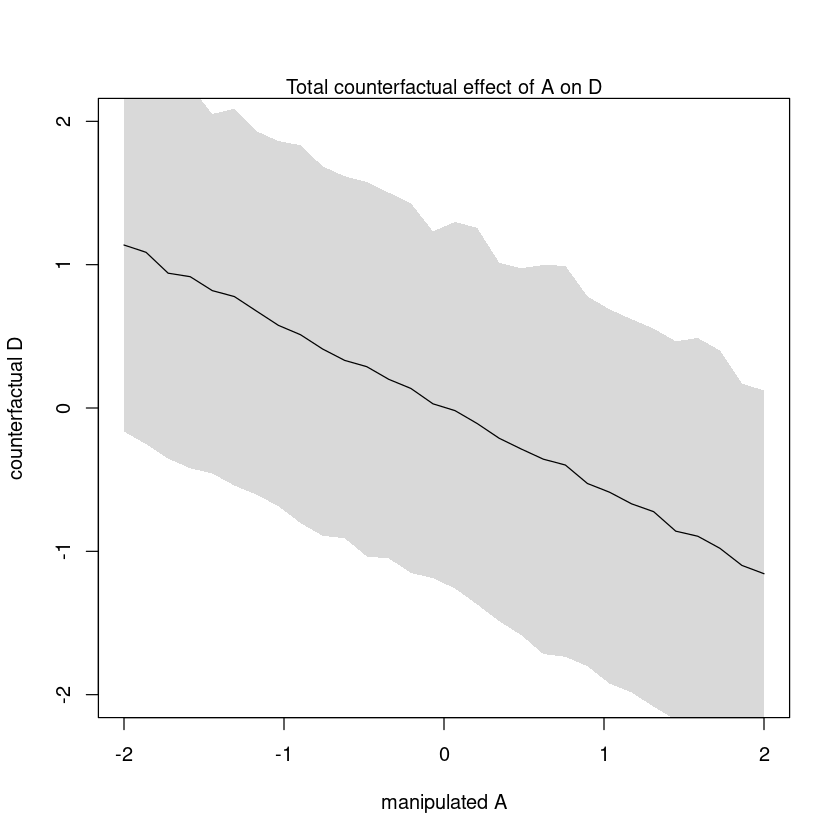

In [50]:
# Book has error dat should be sim_dat
# display counterfactual predictions
plot( sim_dat$A , colMeans(s$D) , ylim=c(-2,2) , type="l" , xlab="manipulated A" , ylab="counterfactual D" )
shade( apply(s$D,2,PI) , sim_dat$A )
mtext( "Total counterfactual effect of A on D" )

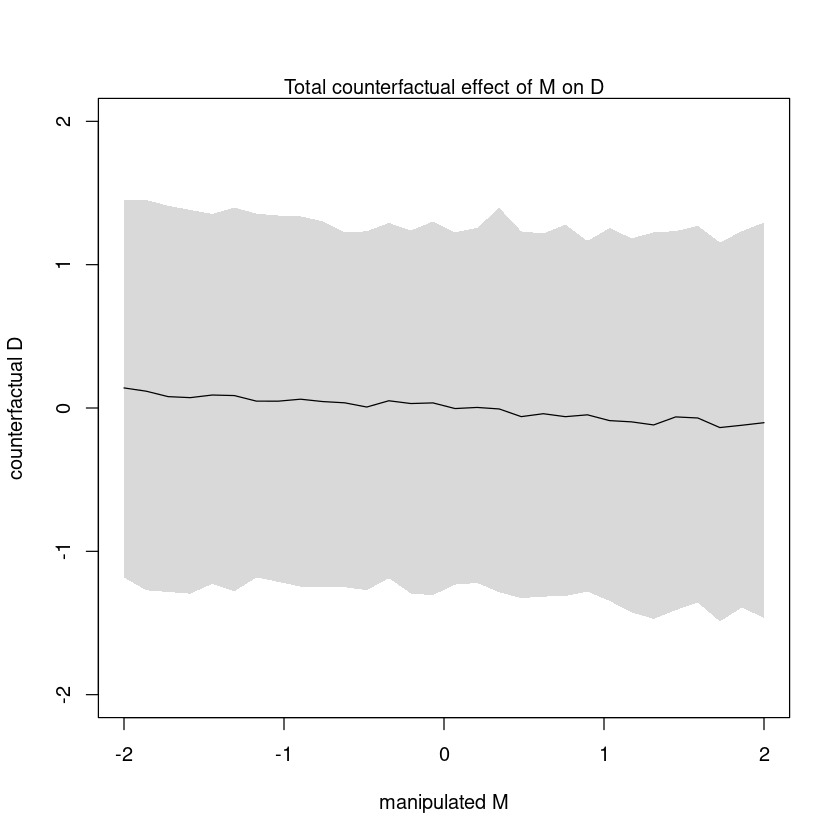

In [51]:
sim_dat <- data.frame( M=seq(from=-2,to=2,length.out=30) , A=0 )
s <- sim( m5.3_A , data=sim_dat , vars="D" )
plot( sim_dat$M , colMeans(s) , ylim=c(-2,2) , type="l" ,
xlab="manipulated M" , ylab="counterfactual D" )
shade( apply(s,2,PI) , sim_dat$M )
mtext( "Total counterfactual effect of M on D" )

# 5.2 Masked Relationship
+ Take two predictor variables that are correlated with each other. One is positively correlated, the other negatively
+ Cannot understand the first paragraph of this section, but I think he is trying  ???? - Cannot follow
+ To what extent is energy content of milk related to the neocortex mass. Also need female body mass

In [52]:
# is this necessary in R? - to keep importing the library over and over again?
library(rethinking)
data(milk)
d <- milk
str(d)

'data.frame':	29 obs. of  8 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 4 4 4 4 2 2 2 2 2 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 8 9 10 16 2 1 6 28 27 ...
 $ kcal.per.g    : num  0.49 0.51 0.46 0.48 0.6 0.47 0.56 0.89 0.91 0.92 ...
 $ perc.fat      : num  16.6 19.3 14.1 14.9 27.3 ...
 $ perc.protein  : num  15.4 16.9 16.9 13.2 19.5 ...
 $ perc.lactose  : num  68 63.8 69 71.9 53.2 ...
 $ mass          : num  1.95 2.09 2.51 1.62 2.19 5.25 5.37 2.51 0.71 0.68 ...
 $ neocortex.perc: num  55.2 NA NA NA NA ...


In [53]:
# Standardize
d$K <- standardize( d$kcal.per.g)
d$N <- standardize( d$neocortex.perc)
d$M <- standardize( log(d$mass))

+ First model is simple bivariate regression
+ Model:
    + $K_i \sim Normal(\mu_i, \sigma)$
    + $\mu_i = \alpha + \beta_NN_i$
    + where:
        + $K$ is standardized kilocalories
        + $N$ is standardized neocortex

In [54]:
m5.5_draft <- quap(
 alist(
  K ~ dnorm(mu, sigma),
  mu <- a + bN*N,
  a ~ dnorm(0,1),
  bN ~ dnorm(0,1),
  sigma ~ dexp(1)
 ) , data=d )

ERROR: Error in quap(alist(K ~ dnorm(mu, sigma), mu <- a + bN * N, a ~ dnorm(0, : initial value in 'vmmin' is not finite
The start values for the parameters were invalid. This could be caused by missing values (NA) in the data or by start values outside the parameter constraints. If there are no NA values in the data, try using explicit start values.


In [55]:
# The error is thrown because the data is full of NaNs
d$neocortex.perc

[1] 55.16    NA    NA    NA    NA 64.54 64.54 67.64    NA 68.85 58.85 61.69
[13] 60.32    NA    NA 69.97    NA 70.41    NA 73.40    NA 67.53    NA 71.26
[25] 72.60    NA 70.24 76.30 75.49

+ COMPLETE CASE ANALYSIS - Means throw out the incomplete cases - just use the complete cases.
+ Before doing this should check it is a valid approach, for obvious reasons.

In [56]:
# Drop the NaNs
dcc <- d[complete.cases(d$K,d$N,d$M),]
str(dcc)

'data.frame':	17 obs. of  11 variables:
 $ clade         : Factor w/ 4 levels "Ape","New World Monkey",..: 4 2 2 2 2 2 2 2 3 3 ...
 $ species       : Factor w/ 29 levels "A palliata","Alouatta seniculus",..: 11 2 1 6 27 5 3 4 21 19 ...
 $ kcal.per.g    : num  0.49 0.47 0.56 0.89 0.92 0.8 0.46 0.71 0.68 0.97 ...
 $ perc.fat      : num  16.6 21.2 29.7 53.4 50.6 ...
 $ perc.protein  : num  15.4 23.6 23.5 15.8 22.3 ...
 $ perc.lactose  : num  68 55.2 46.9 30.8 27.1 ...
 $ mass          : num  1.95 5.25 5.37 2.51 0.68 0.12 0.47 0.32 1.55 3.24 ...
 $ neocortex.perc: num  55.2 64.5 64.5 67.6 68.8 ...
 $ K             : num  -0.94 -1.064 -0.506 1.538 1.724 ...
 $ N             : num  -2.0802 -0.5086 -0.5086 0.0107 0.2135 ...
 $ M             : num  -0.456 0.127 0.141 -0.307 -1.076 ...


In [57]:
m5.5_draft <-quap(alist(
    K ~ dnorm(mu, sigma),
    mu <- a + bN*N,
    a ~ dnorm(0, 1),
    bN ~ dnorm(0,1),
    sigma ~ dexp(1)
    ) , data=dcc )

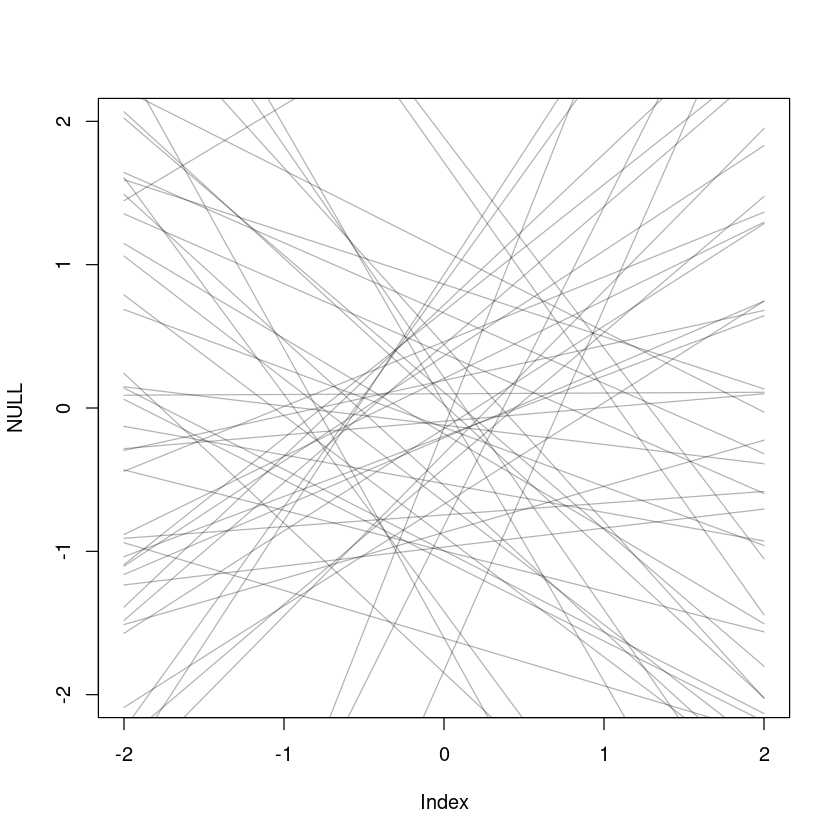

In [58]:
prior <- extract.prior( m5.5_draft )
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

+ These 2 standard deviation priors are not reasonable because they show impossibly strong relationships
+ I don't get this - How does he know the relationship is impossibly strong?
+ And bear in mind that he previously clearly stated that we set the priors BEFORE reviewing the data
+ Don't get how he knows any of these are unreasonable?
+ Well apart from the lines that do not get close to 0,0 - We know the line must get close to that, because we standardized the distributions. But if we know that, why did he plot this? - I don't get the point

In [59]:
m5.5 <-quap(alist(
    K ~ dnorm(mu, sigma),
    mu <- a + bN*N,
    a ~ dnorm(0, 0.2),
    bN ~ dnorm(0, 0.5),
    sigma ~ dexp(1)
    ) , data=dcc )

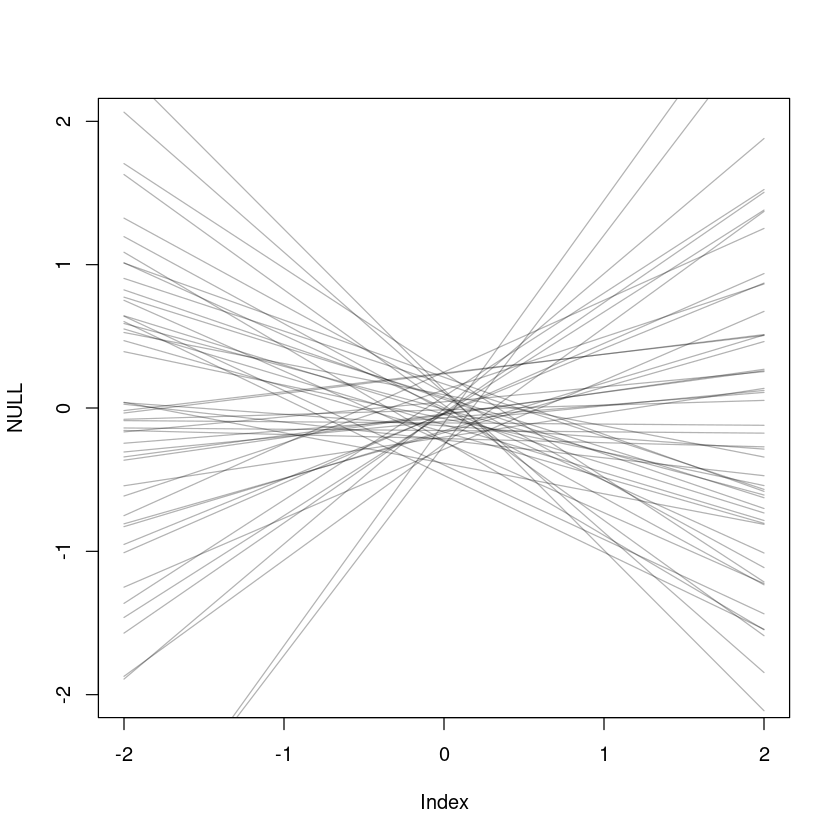

In [60]:
prior <- extract.prior( m5.5)
xseq <- c(-2,2)
mu <- link( m5.5_draft , post=prior , data=list(N=xseq) )
plot( NULL , xlim=xseq , ylim=xseq )
for ( i in 1:50 ) lines( xseq , mu[i,] , col=col.alpha("black",0.3) )

+ These are still very vague priors, but they stay within the high probability region of the observable data. - Cannot understand how he can say this so definitively?

In [61]:
precis(m5.5)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.03994152,0.1544908,-0.2069646,0.2868476
bN,0.13322852,0.2237470,-0.2243625,0.4908195
sigma,0.99982090,0.1647083,0.7365852,1.2630566


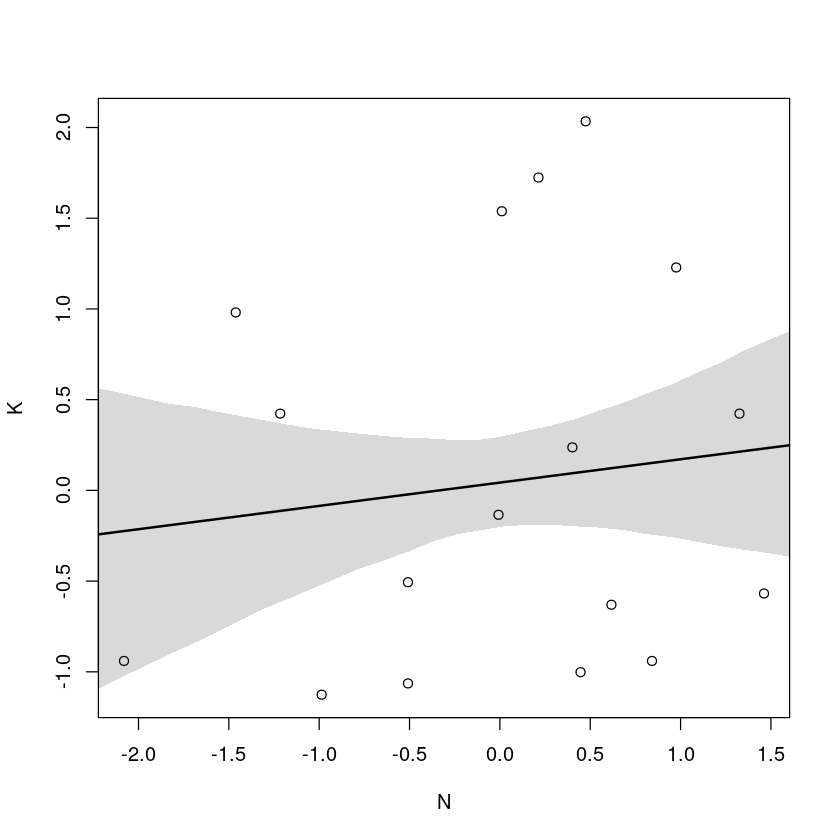

In [62]:
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.5 , data=list(N=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ N , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

+ The posterior mean line is weakly positive
+ The posterior mean line is highly imprecise - relative to what?
+ He says it is imprecise because a lot of mildly positive and negative slopes are plausible
+ Now add another predictor variable - adult female body mass
+ But, unfortunately there is another complication - use the log of mass
+ Why log(mass) instead of mass? - Because scaling measurements are related by magnitudes to other variables (?) Taking the log of a measure translates the measure into magnitudes
+ Cannot follow this argument. Surely neocortex mass and and enegy content are scaling measurements? What does he mean by scaling measurement?
+ Construct a bivariate model of kilocalories and body mass

In [63]:
m5.6 <- quap(
 alist(
  K ~ dnorm( mu , sigma ),
  mu <- a + bM*M,
  a ~ dnorm( 0 , 0.2 ),
  bM ~ dnorm( 0 , 0.5 ),
  sigma ~ dexp( 1 )
 ) , data=dcc )
precis(m5.6)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.04654166,0.1512800,-0.1952331,0.28831640
bM,-0.28253576,0.1928818,-0.5907982,0.02572667
sigma,0.94927966,0.1570616,0.6982648,1.20029449


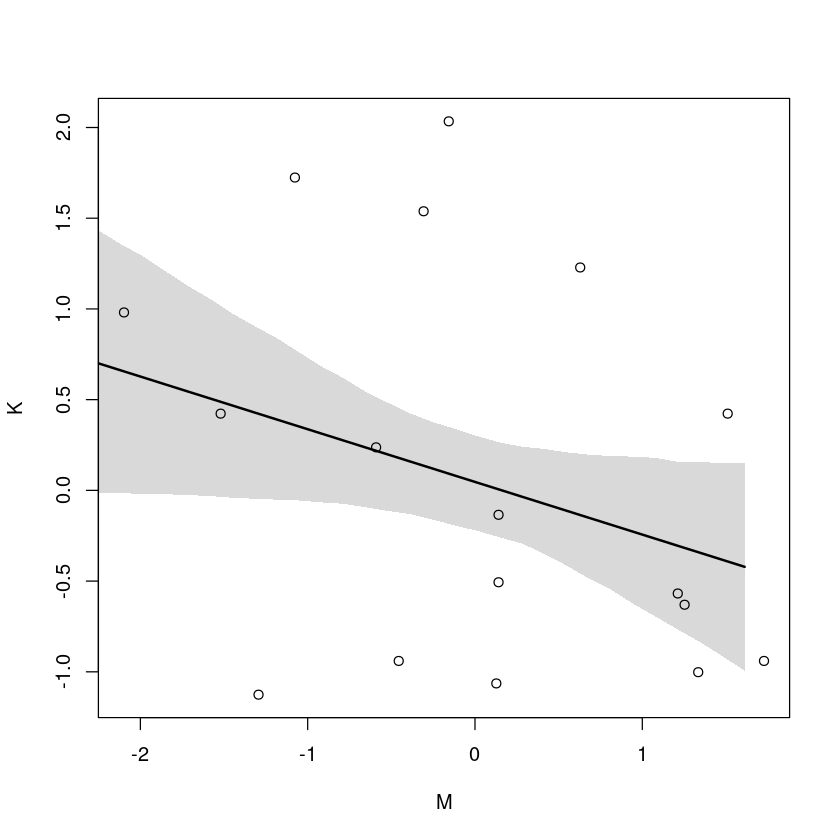

In [64]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.6 , data=list(M=xseq) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( K ~ M , data=dcc )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

+ Association seems stronger than with neocortex mass
+ association is in opposite direction
+ Has high uncertainty
+ Multivariate Regression Model:
    + $K_i \sim Normal(\mu_i, \sigma)$
    + $\mu_i = \alpha + \beta_NN_i + \beta_MM_i$
    + $\alpha \sim Normal(0, 0.2)$
    + $\beta_N \sim Normal(0, 0.5)$
    + $\beta_M \sim Normal(0, 0.5)$
    + $\sigma \sim Exponential(1)$
    


In [65]:
m5.7 <- quap(
 alist(
  K ~ dnorm( mu , sigma ),
  mu <- a + bN*N + bM*M,
  a ~ dnorm( 0 , 0.2 ),
  bN ~ dnorm( 0 , 0.5 ),
  bM ~ dnorm( 0 , 0.5 ),
  sigma ~ dexp( 1 )
 ) , data=dcc )
precis(m5.7)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.06799181,0.1339987,-0.1461640,0.2821476
bN,0.67511785,0.2482986,0.2782888,1.0719469
bM,-0.70299098,0.2207870,-1.0558512,-0.3501307
sigma,0.73801425,0.1324618,0.5263147,0.9497138


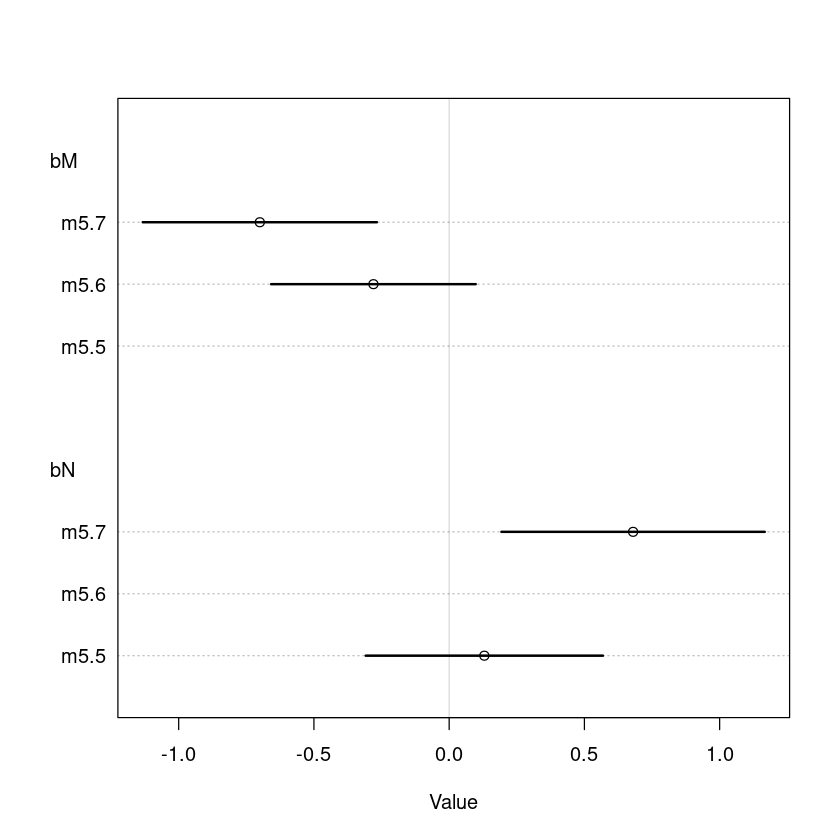

In [66]:
plot( coeftab( m5.5 , m5.6 , m5.7 ) , pars=c("bM", "bN") )

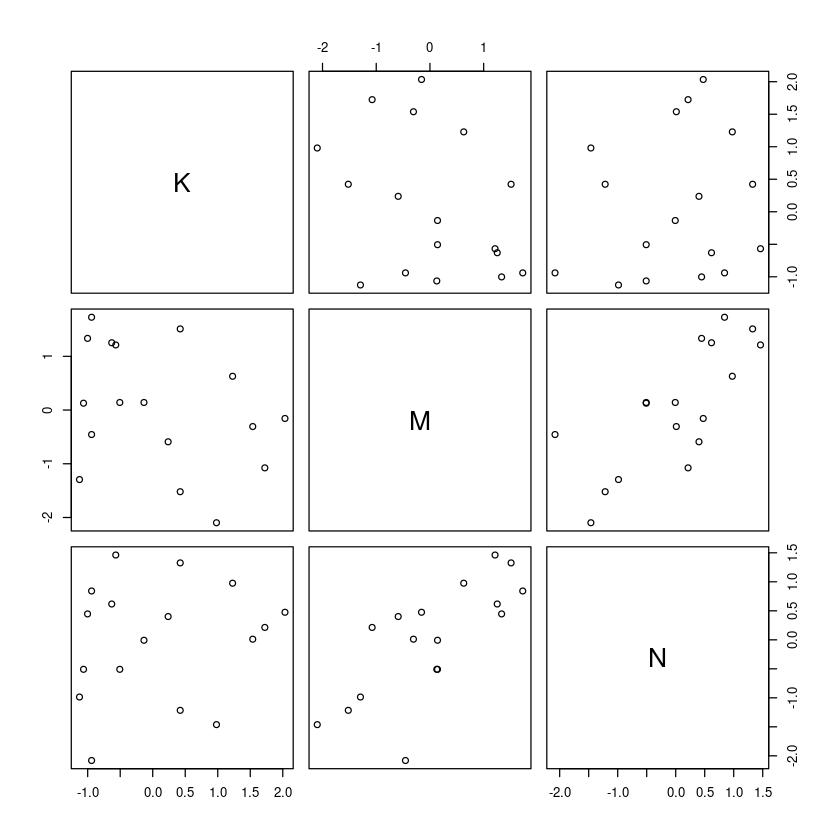

In [67]:
pairs( ~K + M + N , dcc )

+ The model with 2 variables showed stronger associations for both variables.
+ The two variables are both correlated with the outcome K. (pairs plot above)
    + M is negatively correlated with K (I think)
    + N is positively correlated with K (I think)
    + M is positively correlated with N
+ The result of the opposing correlations is that they tend to cancel each other out
+ In this case, linear regression automatically finds the best use of the variables to make inferences.
+ There are 3 possible DAGS for this data:

![alt text](images/5/possible-dags.png "Title")

+ Left: Mass influences Neocortex. Both influence Kilocarories
+ Center: Neocortex influences Mass. Both influence Kilocalories
+ Right: Unobserved variable influences Mass and Neocortex. Mass and Neocortex influence Kilocalories
+ We cannot tell which DAG is correct, because all the DAGs have the same set of conditional independences.
+ A set of DAGs with the same conditional independencies is called a MARKOV EQUIVALENCE set
#### Counterfactual Plots
+ Assume the right hand DAG is correct.
+ Break the link between U and first M and then N
+ First plot - y is kilocalories per gram (standardized), x is log body mass (standardized) - Counterfactual holding N=0

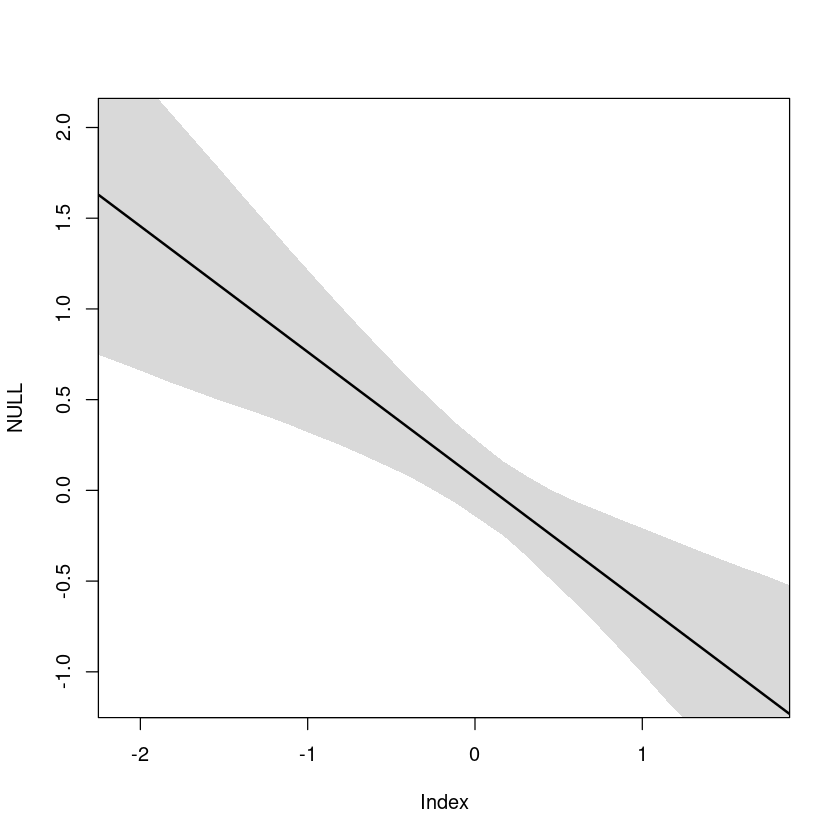

In [68]:
xseq <- seq( from=min(dcc$M)-0.15 , to=max(dcc$M)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( M=xseq , N=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$M) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

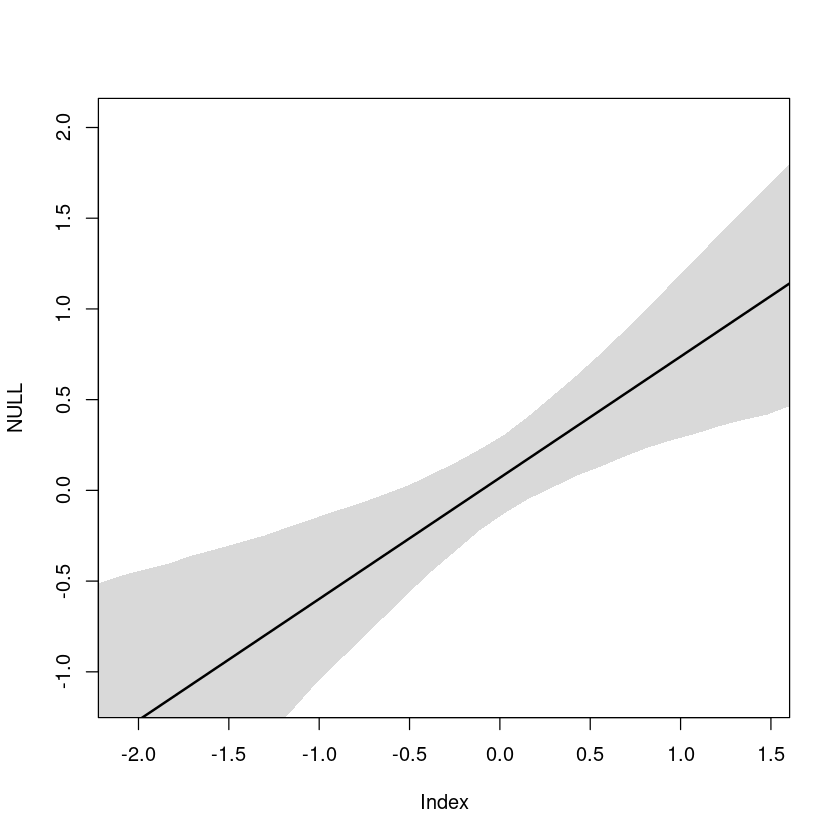

In [69]:
# Counterfactual holding M = 0
xseq <- seq( from=min(dcc$N)-0.15 , to=max(dcc$N)+0.15 , length.out=30 )
mu <- link( m5.7 , data=data.frame( N=xseq , M=0 ) )
mu_mean <- apply(mu,2,mean)
mu_PI <- apply(mu,2,PI)
plot( NULL , xlim=range(dcc$N) , ylim=range(dcc$K) )
lines( xseq , mu_mean , lwd=2 )
shade( mu_PI , xseq )

#### Overthinking: Simulating a masking relationship
+ TODO

# 5.3 Categorical variables
+ Category - discrete and unordered
+ Examples:
    + Sex: Male, Female - Binary category
    + Infant, Juvenile, Adult
    + Africa, Europe, Asia
+ variables like this are called FACTORS and can be invluded in linear models

#### 5.3.1 Binary categories
+ In the Howell data `male` is a binary category 1 for Yes, 0 for No
+ **First approach - Use Indicator variable**
+ Make a model of height with one variable `male`
+ This applies the indicator variable inside the model

In [81]:
data(Howell1)
d <- Howell1
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


+ Model:
    + $h_i \sim Normal(\mu_i, \sigma)$
    + $\mu_i = \alpha + \beta_mm_i$
    + $\alpha \sim Normal(178, 20)$
    + $\beta_m \sim Normal(0,10)$
    + $\sigma \sim Uniform(0,50)$
    + where:
        + $h$ height
        + $m$ is an indicator variable (0 or 1) for male
+ When the indicator variable = 0, we are left with alpha which is the average female height
+ When the indicator variable =1, $\beta_m$ is calculating the expected difference in height between females and males.
+ This approach implies there is more uncertainty in male height
    + Female height is represented by a single parameter $\alpha$
    + whereas male height is based on 2 parameters $\alpha$ and $\beta$
+ **Second approach - Use Index variable**

In [82]:
mu_female <- rnorm(10000,178,20)
mu_male <- rnorm(10000,178,20) + rnorm(10000,0,10)
precis( data.frame( mu_female , mu_male ) )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu_female,177.9348,19.88929,146.5787,209.3707,▁▁▁▃▇▇▂▁▁
mu_male,177.6906,22.26215,142.2662,212.9985,▁▁▁▃▇▇▂▁▁▁


+ + **Second approach - Use Indicator variable**
+ Model:
    + $h_i \sim Normal(\mu_{ij}, \sigma)$
    + $\mu_i = \alpha_{SEX|i|}$
    + $\alpha_j \sim Normal(178, 20) for j=1..2$
    + $\sigma \sim Uniform(0,50)$
+ Creates a list of $\alpha$ parameters - one for each unique value in the index variable

In [83]:
d$sex <- ifelse( d$male==1 , 2 , 1 ) # Seems so complex ifelse - lookup ref
str( d$sex )

 num [1:544] 2 1 1 2 1 2 1 2 1 2 ...


In [84]:
m5.8 <- quap(
 alist(
  height ~ dnorm( mu , sigma ) ,
  mu <- a[sex] ,
  a[sex] ~ dnorm( 178 , 20 ) ,
  sigma ~ dunif( 0 , 50 )
 ) , data=d )
precis( m5.8 , depth=2 )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],134.90987,1.6069478,132.34165,137.47808
a[2],142.57697,1.6974875,139.86406,145.28988
sigma,27.31022,0.8280615,25.98681,28.63362


In [85]:
post <- extract.samples(m5.8)
post$diff_fm <- post$a[,1] - post$a[,2]
precis( post , depth=2 )

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
sigma,27.315907,0.8226086,25.99601,28.648730,▁▁▁▁▁▃▇▇▇▃▂▁▁▁
a[1],134.899268,1.6004923,132.33788,137.464714,▁▁▁▁▂▅▇▇▅▂▁▁▁▁
a[2],142.575464,1.7002801,139.91377,145.310178,▁▁▁▁▁▃▇▇▇▃▂▁▁▁
diff_fm,-7.676195,2.3659318,-11.51433,-3.949376,▁▁▁▁▃▇▇▃▁▁▁


+ Difference in categories `diff_fm` is called a CONTRAST

### 5.3.2 Many categories

In [86]:
data(milk)
d <- milk
levels(d$clade)

[1] "Ape"              "New World Monkey" "Old World Monkey" "Strepsirrhine"

In [87]:
d$clade_id <- as.integer( d$clade )

+ Model:
    + $K_i \sim Normal(\mu_i, \sigma)$
    + $\mu_i = \alpha_{CLADE|i|}$
    + $\alpha_j \sim Normal(0, 0.5)\;for\;j=1..4$
    + $\sigma \sim Exponential(1)$

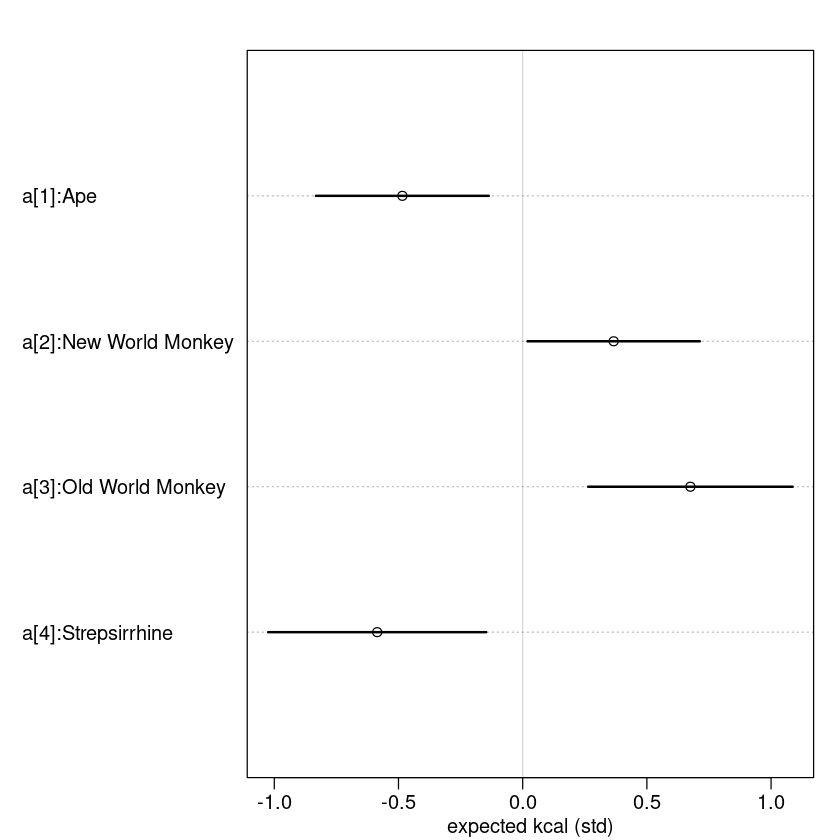

In [88]:
d$K <- standardize( d$kcal.per.g )
m5.9 <- quap(
 alist(
  K ~ dnorm( mu , sigma ),
  mu <- a[clade_id],
  a[clade_id] ~ dnorm( 0 , 0.5 ),
  sigma ~ dexp( 1 )
 ) , data=d )
labels <- paste( "a[" , 1:4 , "]:" , levels(d$clade) , sep="" )
plot( precis( m5.9 , depth=2 , pars="a" ) , labels=labels ,
xlab="expected kcal (std)" )

# TODO - Conditional Independence